# Module 2: Learning Sets of Rules & Analytical Learning

## 🎯 Sequential Covering, FOIL, and Explanation-Based Learning

---

**Arivu AI Machine Learning Course**  
*A comprehensive, hands-on guide to rule-based machine learning*

---

## 📚 Module Overview

Welcome to Module 2! In this module, we'll explore powerful rule-based learning algorithms that create **human-readable, explainable** models.

### Why Rules Matter: The $50 Million Question

Imagine you're a bank processing 10 million transactions daily:
- Fraud costs **$50M annually**
- False alarms annoy **100,000 legitimate customers**
- Regulators demand **explainable decisions**

**Neural Networks say:** *"This is fraud"* (but can't explain why)  
**Rule-Based Systems say:** *"This is fraud BECAUSE amount > $10,000 AND location = overseas AND time = 3am"*

### What You'll Learn

1. **Sequential Covering Algorithms** - Learn rules one at a time
2. **FOIL Algorithm** - Learn first-order rules with variables
3. **Explanation-Based Learning (EBL)** - Learn from prior knowledge
4. **Inductive-Analytical Approaches** - Combine data and knowledge

### Learning Objectives

By the end of this module, you will be able to:

✅ Implement sequential covering algorithms from scratch  
✅ Design and apply FOIL to learn first-order rules  
✅ Use prior knowledge to guide learning (EBL)  
✅ Choose the right rule learning approach for your problem  
✅ Explain when rules are better than decision trees or neural networks  

---

## 📦 Setup and Dependencies

In [10]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
from collections import defaultdict, Counter
from itertools import combinations, product
from copy import deepcopy
import math

# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✅ All libraries imported successfully!")
print("📊 Visualization settings configured")
print("🚀 Ready to learn rule-based machine learning!\n")

✅ All libraries imported successfully!
📊 Visualization settings configured
🚀 Ready to learn rule-based machine learning!



---
## 🛠️ Helper Functions

In [11]:
def load_json_data(filepath=None):
    """
    Load JSON data from a file path. If no path provided, prompt user to enter it.

    Args:
        filepath: Optional path to JSON file. If None, user will be prompted.

    Returns:
        Dictionary containing loaded data or None if error occurs
    """
    if filepath is None:
        filepath = input("Enter the full path to your JSON dataset: ").strip()

    try:
        with open(filepath, 'r') as f:
            data = json.load(f)
        print(f"✅ Successfully loaded {filepath}")
        return data
    except FileNotFoundError:
        print(f"❌ Error: File not found at {filepath}")
        return None
    except json.JSONDecodeError:
        print(f"❌ Error: {filepath} is not valid JSON")
        return None

def print_section_header(title, emoji="📌"):
    """
    Print a formatted section header.

    Args:
        title: Section title
        emoji: Emoji to display
    """
    print("\n" + "="*80)
    print(f"{emoji} {title}")
    print("="*80 + "\n")

def calculate_entropy(examples, target_attr):
    """
    Calculate entropy of a set of examples.
    
    Entropy measures the impurity or randomness in a dataset:
    - Entropy = 0: All examples belong to the same class (pure)
    - Entropy = 1: Examples are evenly split between classes (maximum impurity)
    - Formula: H(S) = -Σ(p_i * log2(p_i)) where p_i is proportion of class i
    
    In information theory, entropy refers to the measure of uncertainty or average information content in a 
    random variable’s possible outcomes
    
    Entropy measures how unpredictable or random a system is.

    - If all outcomes are equally likely (e.g., a fair coin), entropy is maximal because each outcome is uncertain.

    - If one outcome is nearly certain (e.g., a biased coin that always lands heads), entropy is low because the 
    event is predictable.

    Example:
    - [Yes, Yes, Yes, Yes] → Entropy = 0 (perfectly pure)
    - [Yes, No, Yes, No] → Entropy = 1 (maximum impurity)
    - [Yes, Yes, Yes, No] → Entropy = 0.811 (mostly pure)

    Args:
        examples: List of example dictionaries
        target_attr: Name of the target attribute

    Returns:
        Entropy value (0 to log2(num_classes))
    """
    if len(examples) == 0:
        return 0

    # Count occurrences of each class
    class_counts = Counter([ex[target_attr] for ex in examples])
    total = len(examples)

    # Calculate entropy
    entropy = 0
    for count in class_counts.values():
        if count > 0:
            p = count / total
            entropy -= p * math.log2(p)

    return entropy

def calculate_information_gain(examples, attribute, target_attr):
    """
    Calculate information gain for an attribute.
    
    Information gain measures how much information a particular attribute provides about the target class.
    It quantifies the reduction in entropy (uncertainty) achieved by splitting the data based on that attribute.
    
    When splitting data using a feature, Information Gain tells how much that feature reduces the entropy.
    - A high information gain means the feature provides useful information and clearly separates classes.
    - A low information gain means the feature doesn’t help much in predicting outcomes.

    Information Gain = Entropy(Parent) - Weighted Average Entropy(Children)
    
    - Higher information gain means the attribute is more useful for classification
    - Attributes with higher information gain are preferred when building decision trees
    - Information gain of 0 means the attribute provides no useful information
    
    Example:
    - If splitting on "Weather" reduces entropy from 1.0 to 0.5, information gain = 0.5
    - This means "Weather" is a good attribute for making decisions
    
    Args:
        examples: List of example dictionaries
        attribute: Attribute to evaluate
        target_attr: Name of the target attribute

    Returns:
        Information gain value (0 to max entropy of parent)
    """
    # Calculate entropy before split
    total_entropy = calculate_entropy(examples, target_attr)

    # Get unique values for this attribute
    values = set([ex[attribute] for ex in examples])

    # Calculate weighted entropy after split
    weighted_entropy = 0
    for value in values:
        subset = [ex for ex in examples if ex[attribute] == value]
        weight = len(subset) / len(examples)
        weighted_entropy += weight * calculate_entropy(subset, target_attr)

    # Information gain is the reduction in entropy
    return total_entropy - weighted_entropy

print("✅ Helper functions defined successfully!")

✅ Helper functions defined successfully!


---

# Part 1: Understanding Rule-Based Learning

## 🧠 Slide 3: How Humans Learn Rules

### Learning Email Filtering Step by Step

Let's simulate how humans naturally learn rules through trial, error, and refinement!


🧠 Human-Like Rule Learning: Email Spam Detection

📧 Learning Process (Like a Human Brain):

Email 1: "FREE GIFTS! Click now!!!" → 🚫 SPAM
   Your Brain: 'Hmm, all caps and FREE seems suspicious...'
   Rule 1: IF contains('FREE') THEN spam
   Memory: Remember this pattern

Email 2: "Meeting at 3pm tomorrow" → ✅ NOT SPAM
   Your Brain: 'Wait, this is fine. My rule still works!'
   Rule 1 still valid

Email 3: "You won $1,000,000!" → 🚫 SPAM
   Your Brain: 'Also spam, but different pattern... money amounts!'
   Refined Rule: IF contains('FREE') OR (contains('won') AND contains('$')) THEN spam
   Learning: Combining multiple patterns

Email 4: "Invoice for $500 attached" → ✅ NOT SPAM
   Your Brain: 'Oops! This has $ but it's legitimate...'
   Final Rule: IF (contains('FREE') AND all_caps) OR
               (contains('won') AND contains('$') AND no_attachment) THEN spam
   Memory: Refined understanding

💡 Key Insight: Humans naturally learn rules through trial, error, and refinement
   —exac

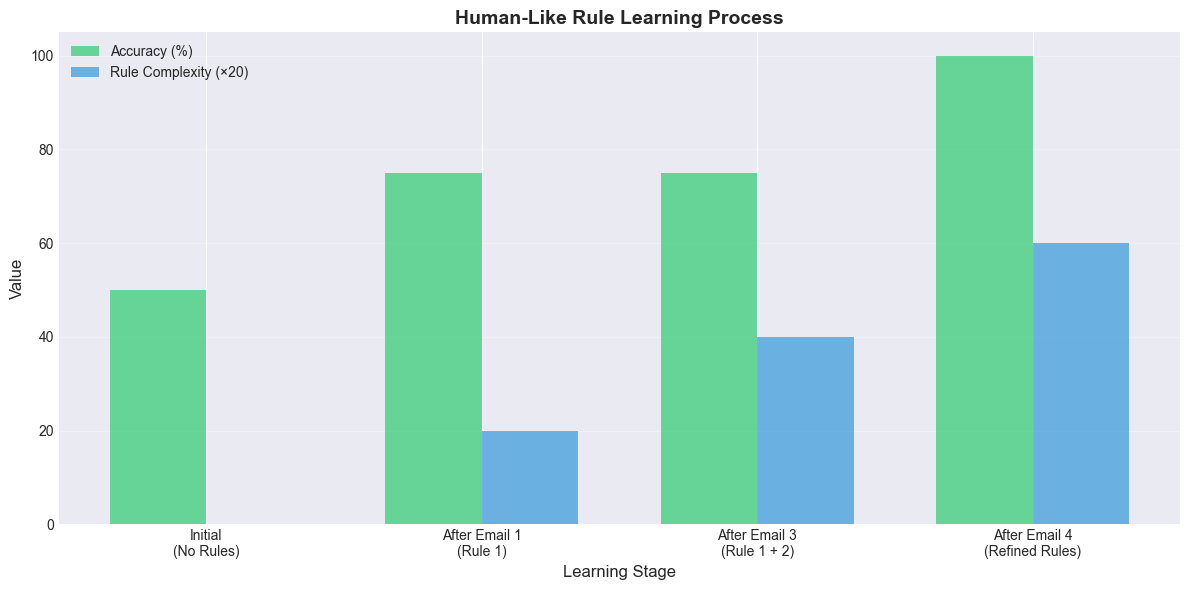


🎯 This is exactly what Sequential Covering algorithms do!


In [12]:
print_section_header("Human-Like Rule Learning: Email Spam Detection", "🧠")

# Simulate human learning process
emails = [
    {"id": 1, "text": "FREE GIFTS! Click now!!!", "spam": True},
    {"id": 2, "text": "Meeting at 3pm tomorrow", "spam": False},
    {"id": 3, "text": "You won $1,000,000!", "spam": True},
    {"id": 4, "text": "Invoice for $500 attached", "spam": False},
]

print("📧 Learning Process (Like a Human Brain):\n")

# Email 1
print(f"Email {emails[0]['id']}: \"{emails[0]['text']}\" → {'🚫 SPAM' if emails[0]['spam'] else '✅ NOT SPAM'}")
print("   Your Brain: 'Hmm, all caps and FREE seems suspicious...'")
print("   Rule 1: IF contains('FREE') THEN spam")
print("   Memory: Remember this pattern\n")

# Email 2
print(f"Email {emails[1]['id']}: \"{emails[1]['text']}\" → {'🚫 SPAM' if emails[1]['spam'] else '✅ NOT SPAM'}")
print("   Your Brain: 'Wait, this is fine. My rule still works!'")
print("   Rule 1 still valid\n")

# Email 3
print(f"Email {emails[2]['id']}: \"{emails[2]['text']}\" → {'🚫 SPAM' if emails[2]['spam'] else '✅ NOT SPAM'}")
print("   Your Brain: 'Also spam, but different pattern... money amounts!'")
print("   Refined Rule: IF contains('FREE') OR (contains('won') AND contains('$')) THEN spam")
print("   Learning: Combining multiple patterns\n")

# Email 4
print(f"Email {emails[3]['id']}: \"{emails[3]['text']}\" → {'🚫 SPAM' if emails[3]['spam'] else '✅ NOT SPAM'}")
print("   Your Brain: 'Oops! This has $ but it's legitimate...'")
print("   Final Rule: IF (contains('FREE') AND all_caps) OR")
print("               (contains('won') AND contains('$') AND no_attachment) THEN spam")
print("   Memory: Refined understanding\n")

print("💡 Key Insight: Humans naturally learn rules through trial, error, and refinement")
print("   —exactly what ML algorithms do!\n")

# Visualize the learning process
fig, ax = plt.subplots(figsize=(12, 6))

stages = ['Initial\n(No Rules)', 'After Email 1\n(Rule 1)', 'After Email 3\n(Rule 1 + 2)', 'After Email 4\n(Refined Rules)']
accuracy = [50, 75, 75, 100]  # Simulated accuracy
complexity = [0, 1, 2, 3]  # Number of conditions

x = np.arange(len(stages))
width = 0.35

ax.bar(x - width/2, accuracy, width, label='Accuracy (%)', color='#2ecc71', alpha=0.7)
ax.bar(x + width/2, [c*20 for c in complexity], width, label='Rule Complexity (×20)', color='#3498db', alpha=0.7)

ax.set_xlabel('Learning Stage', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Human-Like Rule Learning Process', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(stages)
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 This is exactly what Sequential Covering algorithms do!")

---
# Part 2: Sequential Covering Algorithms

## 🎯 Slide 4-5: Sequential Covering - The Main Idea

### What are Sequential Covering Algorithms?

Sequential covering algorithms are a **class of rule-based machine learning algorithms** used for classification.  
They learn rules by **covering positive examples sequentially**, one rule at a time, until the dataset is adequately described.

Think of it like **peeling an onion**: each layer you peel (learn a rule) removes a portion of the examples, gradually revealing the remaining structure.


### How Sequential Covering Works

1. **Start with an empty rule set**  
   - Initially, no rules exist. The algorithm will generate rules iteratively.

2. **Iteratively learn rules**  
   - While there are still uncovered positive examples:
     - Learn a rule that **covers some positive examples**.
     - **Remove** the covered positive examples from the training set.
     - Add the learned rule to the rule set.

3. **Return the complete rule set**  
   - After all (or most) positive examples are covered, the algorithm outputs a set of rules representing the target concept.

### Key Characteristics

- **Greedy Approach**  
   - Makes **locally optimal choices** at each step without reconsidering previous decisions.
   
   - Each rule is learned to optimize **local criteria** (e.g., information gain).  
      - The algorithm makes the **best choice at each step** without considering future implications.
      - May not produce a globally optimal set of rules since earlier decisions can't be undone.
      - Similar to choosing the shortest path at each intersection without knowing the full route ahead.

   - **Rule Specialization**  
      - Start with general rules and **add conditions** to make them more specific.  

   - **Coverage-Based**  
      - Focus on covering **positive examples** while avoiding negative ones.

### Common Sequential Covering Algorithms

#### 1. FOIL (First-Order Inductive Learner)
- Uses **information gain** to select the best literals.
- Designed for **first-order logic rules**.
- Handles **relational data** effectively.

#### 2. CN2 Algorithm
- Uses **entropy-based heuristics**.
- Handles **noisy data** well.
- Can generate **ordered or unordered rule lists**.

#### 3. RIPPER (Repeated Incremental Pruning to Reduce Error)
- Includes **post-pruning** to reduce overfitting.
- Uses **reduced error pruning**.
- Efficient for **large datasets**.

### Advantages

- **Interpretable**: Rules are easy to understand and explain.  
- **Flexible**: Can handle different types of features.  
- **Incremental**: Learns rules one at a time.  
- **Domain Knowledge**: Expert knowledge can be easily incorporated.

### Disadvantages

- **Greedy Nature**: May not find globally optimal rule sets.  
- **Order Dependency**: The order in which rules are learned can affect final results.  
- **Overfitting**: May create overly specific rules for noisy data.  
- **Computational Complexity**: Can be expensive for very large datasets.

### Divide and Conquer vs. Sequential Covering

| Approach | Key Idea | Example Algorithm |
|----------|----------|-----------------|
| **Decision Trees (ID3)** | Learn the **entire tree simultaneously**. Splits affect all branches; rules share decisions at top nodes. | ID3, C4.5 |
| **Rule Learning (Sequential Covering)** | Learn rules **one at a time**. Remove covered examples after each rule. Each rule is independent. | FOIL, CN2, RIPPER |

### The Sequential Covering Process (Illustrative Example)

1. **Learn Rule 1**  
   - Covers a large number of positive examples.

2. **Remove covered examples**  
   - Only the remaining uncovered positive examples stay in the dataset.

3. **Learn Rule 2**  
   - Covers some of the remaining positive examples.

4. **Repeat**  
   - Continue until **all (or most) positive examples are covered**.

**Visual Analogy:**  
- Imagine you are **painting positive examples green**.  
- Each rule paints a subset of examples green.  
- Once all positive examples are green, you stop.

### Intuition

- Sequential covering is particularly useful when **interpretable, human-readable rules** are required.  
- Each rule can be examined individually, making it suitable for **domains like medical diagnosis**, where explanations are critical.


🎯 Sequential Covering: Fraud Detection Example

Please provide 'fraud_detection_dataset.json' dataset path
✅ Successfully loaded data/fraud_detection_dataset.json
📊 Dataset Description:
   Credit card fraud detection dataset for learning rule-based classification

🔍 Attributes:
   • amount: Transaction amount category (Low, Medium, High, VeryHigh)
   • location: Transaction location (Domestic, Overseas)
   • time: Time of transaction (Morning, Afternoon, Evening, Night)
   • merchant_type: Type of merchant (Retail, Online, Restaurant, Gas, ATM)
   • frequency: Recent transaction frequency (Low, Medium, High)
   • card_present: Was card physically present (Yes, No)

📈 Training Examples: 15
📈 Test Examples: 4

📋 Sample Training Data:

transaction_id   amount location      time merchant_type frequency card_present is_fraud
          T001      Low Domestic   Morning        Retail       Low          Yes       No
          T002 VeryHigh Overseas     Night        Online      High           N

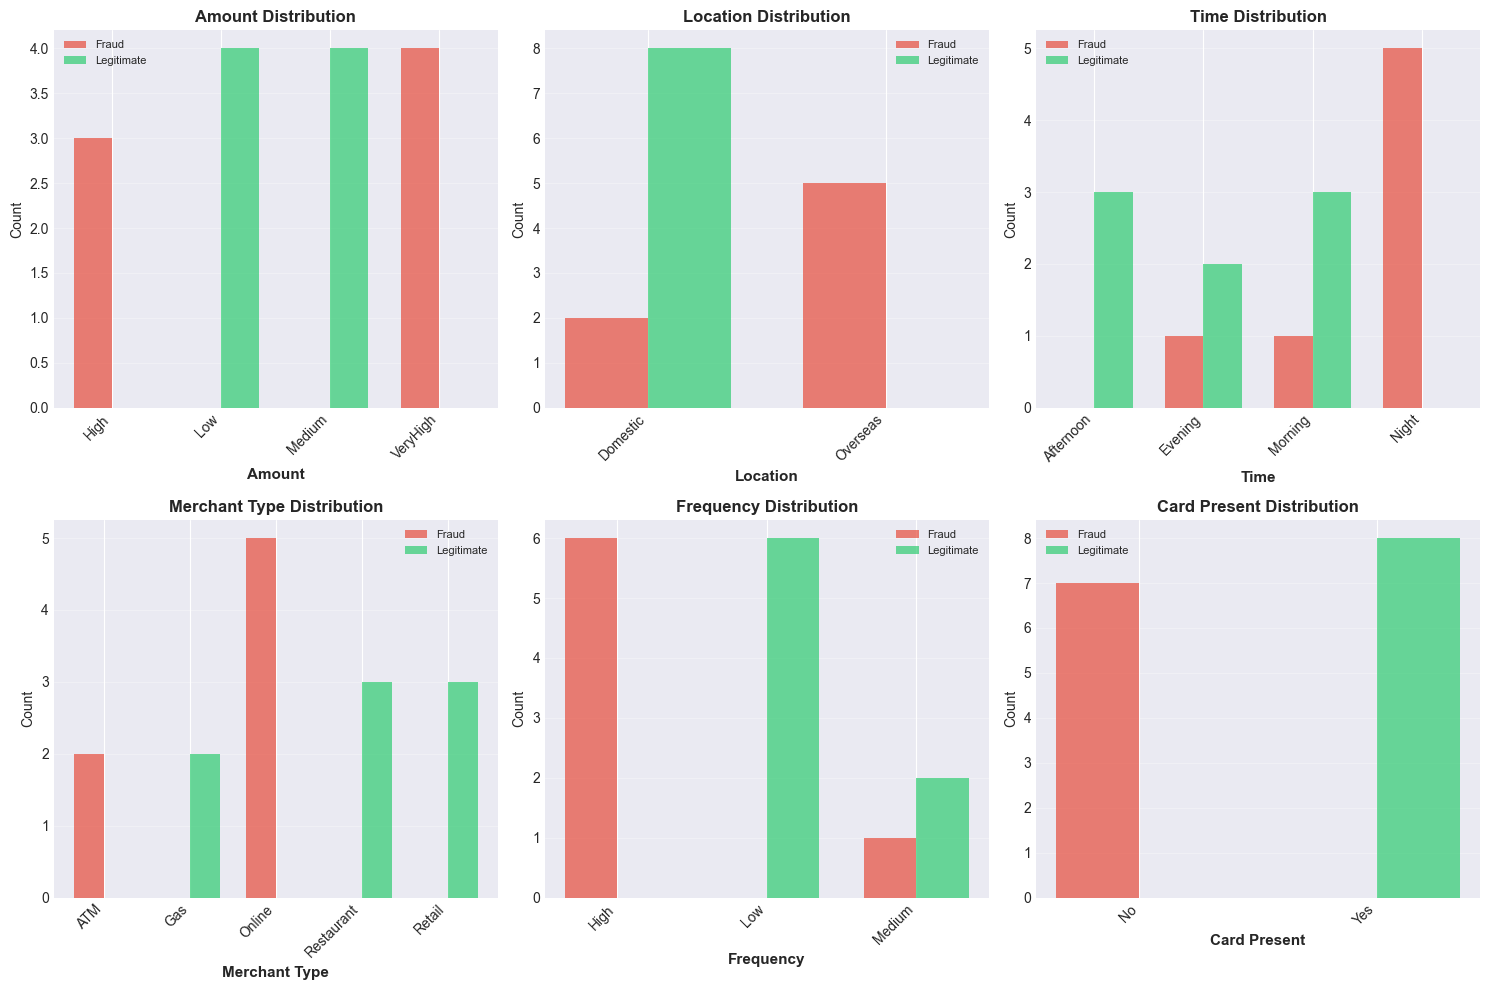


💡 Notice: Different attributes have different discriminative power!
   Sequential covering will learn rules that exploit these patterns.


In [13]:
# Load fraud detection dataset
print_section_header("Sequential Covering: Fraud Detection Example", "🎯")

print("Please provide 'fraud_detection_dataset.json' dataset path")
fraud_data = load_json_data('data/fraud_detection_dataset.json')

print("📊 Dataset Description:")
print(f"   {fraud_data['description']}\n")

print("🔍 Attributes:")
for attr, desc in fraud_data['attributes'].items():
    print(f"   • {attr}: {desc}")

# Convert to DataFrame
train_fraud = pd.DataFrame(fraud_data['training_data'])
test_fraud = pd.DataFrame(fraud_data['test_data'])

print(f"\n📈 Training Examples: {len(train_fraud)}")
print(f"📈 Test Examples: {len(test_fraud)}\n")

# Display sample data
print("📋 Sample Training Data:\n")
print(train_fraud.head(10).to_string(index=False))

# Visualize class distribution
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

attributes = ['amount', 'location', 'time', 'merchant_type', 'frequency', 'card_present']
colors_map = {'Yes': '#e74c3c', 'No': '#2ecc71'}

for idx, attr in enumerate(attributes):
    ax = axes[idx]

    # Count occurrences for each value
    fraud_data_attr = train_fraud[train_fraud['is_fraud'] == 'Yes'][attr].value_counts()
    legit_data_attr = train_fraud[train_fraud['is_fraud'] == 'No'][attr].value_counts()

    # Get all unique values
    all_values = sorted(set(train_fraud[attr].unique()))

    # Create grouped bar chart
    x = np.arange(len(all_values))
    width = 0.35

    fraud_counts = [fraud_data_attr.get(val, 0) for val in all_values]
    legit_counts = [legit_data_attr.get(val, 0) for val in all_values]

    ax.bar(x - width/2, fraud_counts, width, label='Fraud', color='#e74c3c', alpha=0.7)
    ax.bar(x + width/2, legit_counts, width, label='Legitimate', color='#2ecc71', alpha=0.7)

    ax.set_xlabel(attr.replace('_', ' ').title(), fontsize=11, fontweight='bold')
    ax.set_ylabel('Count', fontsize=10)
    ax.set_title(f'{attr.replace("_", " ").title()} Distribution', fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(all_values, rotation=45, ha='right')
    ax.legend(fontsize=8)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Notice: Different attributes have different discriminative power!")
print("   Sequential covering will learn rules that exploit these patterns.")

---

## 📝 Implementing Sequential Covering

### Understanding the Algorithm

Sequential covering algorithms work by **learning rules one at a time** until all (or most) positive examples are covered.  
The process involves **two nested loops**: an outer loop for covering examples and an inner loop for learning a single rule.

### OUTER LOOP (Sequential Covering)

- Learn **one rule at a time**.
- Remove the positive examples that the rule **successfully covers**.
- Repeat until a **stopping criterion** is met (e.g., all positive examples covered or a maximum number of rules reached).

### INNER LOOP (Learn-One-Rule)

- Start with the **most general rule**, which initially covers **all examples**.
- **Specialize the rule** by adding constraints (conditions) to reduce coverage of negative examples.
- Continue specialization until the rule reaches a desired **accuracy or purity**.
- Return the learned rule to the outer loop.

### Key Difference from Decision Trees

| Feature | Decision Trees | Sequential Covering |
|---------|----------------|-------------------|
| Learning Style | All rules simultaneously (build entire tree) | One rule at a time, independently |
| Rule Independence | Rules are part of a single tree | Each rule is independent |
| Concept Type | Conjunctive concepts | Disjunctive concepts (Rule1 OR Rule2 OR Rule3) |
| Interpretability | Moderate (tree structure) | High (rules are simple, readable) |

## Conjunctive vs Disjunctive Concepts

**Conjunctive Concepts** are defined by a **single rule with multiple conditions connected by AND**.
- All conditions must be true simultaneously
- Example: `SafeToStack(x,y) ← Lighter(x,y) AND Stable(x) AND Compatible(x,y)`
- Decision trees naturally learn conjunctive concepts (each path is an AND of conditions)

**Disjunctive Concepts** are defined by **multiple alternative rules connected by OR**.
- Any one of several different rule patterns can make the concept true
- Example: `Fraud ← (Amount=VeryHigh AND Location=Overseas) OR (Time=Night AND CardPresent=No) OR (Frequency=High AND MerchantType=ATM)`
- Sequential covering naturally learns disjunctive concepts (Rule1 OR Rule2 OR Rule3...)

### Visual Example: Email Spam Detection

**Conjunctive (Decision Tree Approach):**
```
IF (contains_money=True AND all_caps=True AND from_unknown=True) 
THEN spam
```
*All three conditions must be met*

**Disjunctive (Sequential Covering Approach):**
```
Rule1: IF contains_money=True THEN spam  OR
Rule2: IF all_caps=True THEN spam       OR  
Rule3: IF from_unknown=True THEN spam
```
*Any single condition can indicate spam*

### Why This Matters

- **Real-world concepts are often disjunctive**: There are usually multiple independent ways something can be true
- **Sequential covering excels at disjunctive concepts** because each rule captures a different "way to be positive"
- **Decision trees struggle with disjunctive concepts** because they force a single tree structure, leading to redundant subtrees
### Why Sequential Covering Matters

- Each rule can be **very different** from others, allowing flexible coverage of complex concepts.
- Rules are **easy to understand and modify individually**, which is helpful for debugging or domain adaptation.
- Ideal for **disjunctive concepts** where multiple independent rules explain positive examples.
- Highly **explainable to stakeholders**:  
  > Example: "This transaction is fraud **because** it exceeds $10,000 AND originates from a new account."


In [ ]:
# Rule class to represent learned rules
print_section_header("Rule Representation", "📝")

class Rule:
    """
    Represents a single if-then rule.

    A rule consists of:
    - conditions: Dictionary of attribute-value pairs (the IF part)
    - prediction: The predicted class (the THEN part)
    - coverage: Number of examples covered
    - accuracy: Proportion of covered examples correctly classified
    """

    def __init__(self, conditions=None, prediction=None):
        """
        Initialize a rule.

        Args:
            conditions: Dictionary of {attribute: value} pairs
            prediction: Predicted class label
        """
        self.conditions = conditions if conditions else {}
        self.prediction = prediction
        self.coverage = 0
        self.accuracy = 0.0
        self.positive_covered = 0
        self.negative_covered = 0

    def matches(self, example):
        """
        Check if this rule matches (covers) an example.

        Args:
            example: Dictionary representing an example

        Returns:
            True if all conditions are satisfied, False otherwise
        """
        for attr, value in self.conditions.items():
            if attr not in example or example[attr] != value:
                return False
        return True

    def evaluate(self, examples, target_attr):
        """
        Evaluate rule performance on a set of examples.

        Args:
            examples: List of example dictionaries
            target_attr: Name of the target attribute
        """
        # Find all examples that match this rule's conditions
        covered = [ex for ex in examples if self.matches(ex)]
        # Set the total number of examples covered by this rule
        self.coverage = len(covered)

        if self.coverage > 0:
            # Count how many covered examples have the correct prediction
            correct = sum(1 for ex in covered if ex[target_attr] == self.prediction)
            # Calculate accuracy as the proportion of correct predictions among covered examples
            self.accuracy = correct / self.coverage

            # Count positive examples (those matching the prediction)
            self.positive_covered = sum(1 for ex in covered if ex[target_attr] == self.prediction)
            # Count negative examples (those not matching the prediction)
            self.negative_covered = self.coverage - self.positive_covered
        else:
            # If no examples are covered, set accuracy and counts to zero
            self.accuracy = 0.0
            self.positive_covered = 0
            self.negative_covered = 0

    def __str__(self):
        """
        String representation of the rule.
        """
        if not self.conditions:
            return f"IF TRUE THEN {self.prediction}"

        conditions_str = " AND ".join([f"{attr}={value}" for attr, value in self.conditions.items()])
        return f"IF {conditions_str} THEN {self.prediction}"

    def __repr__(self):
        return self.__str__()

# Example: Create and test a rule
print("📋 Example Rule Creation:\n")

# Create a rule: IF amount=VeryHigh AND location=Overseas THEN Fraud
example_rule = Rule(
    conditions={'amount': 'VeryHigh', 'location': 'Overseas'},
    prediction='Yes'
)

print(f"Rule: {example_rule}")

# Test on training data
example_rule.evaluate(fraud_data['training_data'], 'is_fraud')

print(f"\nPerformance:")
print(f"   Coverage: {example_rule.coverage} examples")
print(f"   Accuracy: {example_rule.accuracy*100:.1f}%")
print(f"   Positive covered: {example_rule.positive_covered}")
print(f"   Negative covered: {example_rule.negative_covered}")

# Show which examples it covers
print(f"\n📊 Examples covered by this rule:")
for ex in fraud_data['training_data']:
    if example_rule.matches(ex):
        match = '✓' if ex['is_fraud'] == example_rule.prediction else '✗'
        print(f"   {ex['transaction_id']}: {ex['amount']}, {ex['location']} → {ex['is_fraud']} {match}")

print("\n💡 This rule has high accuracy but may not cover all fraud cases!")
print("   Sequential covering will learn additional rules for remaining cases.")


📝 Rule Representation

📋 Example Rule Creation:

Rule: IF amount=VeryHigh AND location=Overseas THEN Yes

Performance:
   Coverage: 3 examples
   Accuracy: 100.0%
   Positive covered: 3
   Negative covered: 0

📊 Examples covered by this rule:
   T002: VeryHigh, Overseas → Yes ✓
   T010: VeryHigh, Overseas → Yes ✓
   T014: VeryHigh, Overseas → Yes ✓

💡 This rule has high accuracy but may not cover all fraud cases!
   Sequential covering will learn additional rules for remaining cases.


---
## 🔍 Learn-One-Rule: General-to-Specific Search

### Understanding How a Single Rule is Learned

Sequential covering learns **rules one at a time**. To learn **one rule**, we perform a **general-to-specific search**, gradually adding conditions to make the rule more precise.

### Step 1: Start with the Most General Rule

- Initially, the rule is **maximally general**, meaning it matches **all examples**.  
- Example: `IF TRUE THEN class = Positive`  
- This rule covers **every example**, both positive and negative.  
- Think of it as a "blank canvas" we will specialize step by step.

### Step 2: Greedily Add Constraints

- We examine all possible **attribute-value pairs** (conditions) we could add to the rule.  
- For each possible condition, we evaluate how well it improves the rule's performance.  
- The **best condition** is added to the rule.  
- Example: Adding `AND Weather = Sunny` may increase accuracy by excluding negative examples.

**Key Idea:** We are moving from **general → specific**, gradually narrowing the rule to cover **mostly positive examples**.

### Step 3: Evaluate Using a Metric

- We need a way to decide **which condition to add**.  
- Common choice: **Information Gain**  
  - Measures how much adding a condition reduces uncertainty (entropy) in the dataset.  
  - Higher gain → better split between positive and negative examples.

### Step 4: Stopping Criteria

The rule stops growing when:

1. **Accuracy threshold is reached**  
   - Example: Rule covers at least 90% of positive examples it applies to.  

2. **No more improvements**  
   - Adding further conditions does **not increase accuracy**.  

3. **Rule becomes too specific**  
   - Covers very few examples, which may lead to overfitting.  

### Optional Enhancement: Beam Search

- Instead of following a single path of specialization, we can explore **top-k candidate rules** at each step.  
- This helps avoid **local optima**, where greedily adding one condition might lead to a suboptimal final rule.  
- Example: Keep the **3 best candidate rules** at each step and expand them in parallel.  

### Summary

- Start **general**, add constraints **one at a time**.  
- Use **information gain** to pick the best conditions.  
- Stop when the rule is **accurate enough** or **cannot improve** further.  
- Optional: Use **beam search** to explore multiple promising rules simultaneously.  

**Intuition:**  
Imagine sculpting a block of clay: you gradually **carve away what doesn’t belong**, leaving only the positive examples your rule should cover.


In [18]:
# Implement Learn-One-Rule
print_section_header("Learn-One-Rule Implementation", "🔍")

def learn_one_rule(examples, attributes, target_attr, target_class, min_coverage=2, accuracy_threshold=0.9):
    """
    Learn a single rule using general-to-specific search.
    
    This function implements the Learn-One-Rule algorithm that starts with the most
    general rule (no conditions) and iteratively adds conditions that improve accuracy
    while maintaining minimum coverage requirements.

    Args:
        examples: List of training examples (dictionaries with attribute-value pairs)
        attributes: List of attribute names to consider for rule conditions
        target_attr: Name of the target attribute (e.g., 'is_fraud')
        target_class: The class this rule should predict (e.g., 'Yes' for fraud)
        min_coverage: Minimum number of examples rule must cover to be valid
        accuracy_threshold: Stop learning when rule accuracy exceeds this value (0.0-1.0)

    Returns:
        Rule object representing the learned rule with conditions and prediction
        
    Example:
        rule = learn_one_rule(
            examples=training_data,
            attributes=['amount', 'location', 'card_present'],
            target_attr='is_fraud',
            target_class='Yes',
            min_coverage=2,
            accuracy_threshold=0.9
        )
    """
    # Start with most general rule (no conditions)
    current_rule = Rule(conditions={}, prediction=target_class)  # Create empty rule that predicts target class
    current_rule.evaluate(examples, target_attr)  # Calculate initial coverage and accuracy

    print(f"🚀 Learning rule for class: {target_class}")
    print(f"   Starting with: {current_rule}")
    print(f"   Initial coverage: {current_rule.coverage}, accuracy: {current_rule.accuracy*100:.1f}%\n")

    iteration = 0  # Track number of iterations

    # Iteratively add conditions
    while current_rule.accuracy < accuracy_threshold and current_rule.coverage >= min_coverage:
        iteration += 1  # Increment iteration counter
        print(f"Iteration {iteration}:")

        # Get examples currently covered by rule
        covered_examples = [ex for ex in examples if current_rule.matches(ex)]  # Filter examples that match current rule

        if len(covered_examples) == 0:  # If no examples covered, stop
            break

        # Find best attribute-value pair to add
        best_gain = -1  # Initialize best gain tracker
        best_attr = None  # Initialize best attribute tracker
        best_value = None  # Initialize best value tracker

        for attr in attributes:  # Try each attribute
            # Skip if already in conditions
            if attr in current_rule.conditions:  # Don't add duplicate conditions
                continue

            # Try each possible value for this attribute
            unique_values = set([ex[attr] for ex in covered_examples])  # Get unique values from covered examples

            for value in unique_values:  # Try each unique value
                # Create candidate rule with this new condition
                candidate_conditions = current_rule.conditions.copy()  # Copy existing conditions
                candidate_conditions[attr] = value  # Add new condition
                candidate_rule = Rule(conditions=candidate_conditions, prediction=target_class)  # Create candidate rule
                candidate_rule.evaluate(examples, target_attr)  # Evaluate candidate rule

                # Calculate information gain
                if candidate_rule.coverage >= min_coverage:  # Only consider rules with sufficient coverage
                    # Simple gain: improvement in accuracy weighted by coverage
                    gain = (candidate_rule.accuracy - current_rule.accuracy) * candidate_rule.coverage  # Calculate gain

                    if gain > best_gain:  # If this is the best gain so far
                        best_gain = gain  # Update best gain
                        best_attr = attr  # Update best attribute
                        best_value = value  # Update best value

        # If no improvement found, stop
        if best_attr is None:  # No beneficial condition found
            print("   No improvement possible. Stopping.\n")
            break

        # Add best condition to rule
        current_rule.conditions[best_attr] = best_value  # Add best condition to current rule
        current_rule.evaluate(examples, target_attr)  # Re-evaluate rule with new condition

        print(f"   Added: {best_attr}={best_value}")
        print(f"   New rule: {current_rule}")
        print(f"   Coverage: {current_rule.coverage}, Accuracy: {current_rule.accuracy*100:.1f}%")
        print(f"   Gain: {best_gain:.3f}\n")

        # Check if we've reached accuracy threshold
        if current_rule.accuracy >= accuracy_threshold:  # If accuracy is good enough
            print(f"   ✅ Accuracy threshold reached!\n")
            break

    print(f"Final rule: {current_rule}")
    print(f"Coverage: {current_rule.coverage}, Accuracy: {current_rule.accuracy*100:.1f}%\n")

    return current_rule  # Return the learned rule

# Test learn-one-rule on fraud detection
print("\n" + "="*80)
print("Testing Learn-One-Rule on Fraud Detection")
print("="*80 + "\n")

# Get attribute names (exclude transaction_id and target)
fraud_attributes = ['amount', 'location', 'time', 'merchant_type', 'frequency', 'card_present']

# Learn a rule for fraud class
fraud_rule = learn_one_rule(
    examples=fraud_data['training_data'],
    attributes=fraud_attributes,
    target_attr='is_fraud',
    target_class='Yes',
    min_coverage=2,
    accuracy_threshold=0.95
)

print("\n💡 Notice how the algorithm:")
print("   1. Started with most general rule (covers everything)")
print("   2. Greedily added conditions that improved accuracy")
print("   3. Stopped when accuracy threshold was reached")
print("   4. Result: A specific, accurate rule for detecting fraud!")


🔍 Learn-One-Rule Implementation


Testing Learn-One-Rule on Fraud Detection

🚀 Learning rule for class: Yes
   Starting with: IF TRUE THEN Yes
   Initial coverage: 15, accuracy: 46.7%

Iteration 1:
   Added: card_present=No
   New rule: IF card_present=No THEN Yes
   Coverage: 7, Accuracy: 100.0%
   Gain: 3.733

   ✅ Accuracy threshold reached!

Final rule: IF card_present=No THEN Yes
Coverage: 7, Accuracy: 100.0%


💡 Notice how the algorithm:
   1. Started with most general rule (covers everything)
   2. Greedily added conditions that improved accuracy
   3. Stopped when accuracy threshold was reached
   4. Result: A specific, accurate rule for detecting fraud!


In [19]:
# Test learn-one-rule with a different attribute combination
print_section_header("Learn-One-Rule: Alternative Example", "🔍")

print("Let's try learning a rule for legitimate transactions (is_fraud = 'No')")
print("This will show how the algorithm finds different patterns.\n")

# Learn a rule for legitimate (non-fraud) transactions
legit_rule = learn_one_rule(
    examples=fraud_data['training_data'],
    attributes=fraud_attributes,
    target_attr='is_fraud',
    target_class='No',  # Learning rules for legitimate transactions
    min_coverage=2,
    accuracy_threshold=0.9
)

print("\n" + "="*80)
print("Comparison: Fraud vs Legitimate Transaction Rules")
print("="*80 + "\n")

print("Fraud Rule (learned earlier):")
print(f"   {fraud_rule}")
print(f"   Coverage: {fraud_rule.coverage}, Accuracy: {fraud_rule.accuracy*100:.1f}%")
print("   Interpretation: Transactions are fraud when card is not physically present\n")

print("Legitimate Rule (just learned):")
print(f"   {legit_rule}")
print(f"   Coverage: {legit_rule.coverage}, Accuracy: {legit_rule.accuracy*100:.1f}%")
print("   Interpretation: Transactions are legitimate when card is physically present\n")

print("💡 Insights:")
print("   • Different target classes lead to complementary rules")
print("   • Card presence is the most discriminative feature in this dataset")
print("   • Rules capture the inverse relationship naturally")

# Test with another target class and different parameters
print("\n" + "="*80)
print("Learning with Different Parameters")
print("="*80 + "\n")

print("Now let's try with stricter accuracy threshold (0.99) for fraud detection:")

strict_fraud_rule = learn_one_rule(
    examples=fraud_data['training_data'],
    attributes=fraud_attributes,
    target_attr='is_fraud',
    target_class='Yes',
    min_coverage=1,  # Allow smaller coverage
    accuracy_threshold=0.99  # Very strict accuracy
)

print(f"\nStrict Fraud Rule: {strict_fraud_rule}")
print(f"Coverage: {strict_fraud_rule.coverage}, Accuracy: {strict_fraud_rule.accuracy*100:.1f}%")

# Show how different attributes might be selected with modified data
print("\n" + "="*80)
print("Understanding Feature Selection Process")
print("="*80 + "\n")

print("Let's examine which attributes the algorithm considered:")
print("\nAttribute discrimination analysis:")

for attr in fraud_attributes:
    # Calculate information gain for each attribute
    info_gain = calculate_information_gain(fraud_data['training_data'], attr, 'is_fraud')
    
    # Count fraud vs legitimate for each value
    values = set([ex[attr] for ex in fraud_data['training_data']])
    print(f"\n{attr.replace('_', ' ').title()}:")
    print(f"   Information Gain: {info_gain:.3f}")
    
    for value in sorted(values):
        fraud_count = sum(1 for ex in fraud_data['training_data'] 
                         if ex[attr] == value and ex['is_fraud'] == 'Yes')
        total_count = sum(1 for ex in fraud_data['training_data'] 
                         if ex[attr] == value)
        fraud_rate = fraud_count / total_count if total_count > 0 else 0
        
        print(f"      {value}: {fraud_count}/{total_count} fraud ({fraud_rate*100:.1f}%)")

print(f"\n🎯 Why 'card_present' was chosen first:")
print("   • Highest information gain")
print("   • Clear separation: No = 100% fraud, Yes = 0% fraud")
print("   • Simple, interpretable rule")


🔍 Learn-One-Rule: Alternative Example

Let's try learning a rule for legitimate transactions (is_fraud = 'No')
This will show how the algorithm finds different patterns.

🚀 Learning rule for class: No
   Starting with: IF TRUE THEN No
   Initial coverage: 15, accuracy: 53.3%

Iteration 1:
   Added: card_present=Yes
   New rule: IF card_present=Yes THEN No
   Coverage: 8, Accuracy: 100.0%
   Gain: 3.733

   ✅ Accuracy threshold reached!

Final rule: IF card_present=Yes THEN No
Coverage: 8, Accuracy: 100.0%


Comparison: Fraud vs Legitimate Transaction Rules

Fraud Rule (learned earlier):
   IF card_present=No THEN Yes
   Coverage: 7, Accuracy: 100.0%
   Interpretation: Transactions are fraud when card is not physically present

Legitimate Rule (just learned):
   IF card_present=Yes THEN No
   Coverage: 8, Accuracy: 100.0%
   Interpretation: Transactions are legitimate when card is physically present

💡 Insights:
   • Different target classes lead to complementary rules
   • Card presen

---
## 🎯 Complete Sequential Covering Algorithm

### Overview

Sequential covering algorithms learn a **set of rules** that together describe the target concept.  
The learning process involves **repeatedly applying the "Learn-One-Rule" procedure** until all (or most) positive examples are covered.

### Steps of the Algorithm

1. **Initialize Rule Set**  
   - Start with an empty set of rules: `Rules = []`.

2. **Outer Loop: Learn Rules Sequentially**  
   - While there are **uncovered positive examples** and stopping criteria are not met:
     1. **Call `learn_one_rule`** to generate a new rule using **general-to-specific search**.  
     2. **Add the learned rule** to the rule set.  
     3. **Remove all examples** that are covered by the new rule from the training set.

3. **Check Stopping Criteria**  
   Stop learning rules when:
   - All positive examples are covered  
   - Newly learned rule quality drops below a threshold  
   - Maximum number of rules is reached  

### Key Properties of the Learned Rule Set

- **Disjunction of Rules:**  
  The final hypothesis is an **OR of all learned rules**:  
  `Rule1 OR Rule2 OR Rule3 ...`  

- **Independent Rules:**  
  Each rule is learned independently, making them **interpretable and easy to analyze**.  

- **Prioritization:**  
  Rules can be **sorted by accuracy or coverage**, allowing more important rules to be evaluated first.

### Advantages of Sequential Covering

- **Explainable:** Each rule is human-readable.  
- **Incremental:** Learns one rule at a time, making debugging easier.  
- **Flexible:** Handles disjunctive concepts naturally (concepts defined by multiple independent rules).  
- **Domain Knowledge Friendly:** Experts can inspect or modify individual rules without affecting others.

In [23]:
# Complete Sequential Covering Algorithm
print_section_header("Sequential Covering Algorithm", "🎯")

def sequential_covering(examples, attributes, target_attr, target_class,
                       max_rules=10, min_coverage=2, accuracy_threshold=0.9):
    """
    Learn a set of rules using sequential covering.

    Args:
        examples: List of training examples
        attributes: List of attribute names
        target_attr: Name of target attribute
        target_class: Class to learn rules for
        max_rules: Maximum number of rules to learn
        min_coverage: Minimum coverage for a rule
        accuracy_threshold: Minimum accuracy for a rule

    Returns:
        List of learned rules
    """
    learned_rules = []  # Initialize list to store learned rules
    remaining_examples = examples.copy()  # Create copy of examples to modify during learning

    # Print initial status of sequential covering process
    print(f"🚀 Starting Sequential Covering for class: {target_class}")
    print(f"   Total examples: {len(examples)}")
    print(f"   Positive examples: {sum(1 for ex in examples if ex[target_attr] == target_class)}\n")

    # Learn rules iteratively up to max_rules limit
    # Each iteration learns ONE rule that covers some positive examples
    # We continue until all positive examples are covered or stopping criteria met
    
    # 📚 EXAMPLE: Why we need multiple iterations
    # 
    # Imagine we have 6 fraud cases to learn rules for:
    # Case 1: VeryHigh amount + Overseas → Fraud
    # Case 2: VeryHigh amount + Overseas → Fraud  
    # Case 3: VeryHigh amount + Domestic → Fraud
    # Case 4: High amount + No card present → Fraud
    # Case 5: Medium amount + No card present → Fraud
    # Case 6: Low amount + Night + Online → Fraud
    #
    # ITERATION 1: Learns "IF card_present=No THEN Fraud"
    #              → Covers cases 4,5 ✓ (2 examples covered)
    #              → Remaining: cases 1,2,3,6 need coverage
    #
    # ITERATION 2: Learns "IF amount=VeryHigh THEN Fraud" 
    #              → Covers cases 1,2,3 ✓ (3 examples covered)
    #              → Remaining: case 6 needs coverage
    #
    # ITERATION 3: Learns "IF time=Night AND merchant_type=Online THEN Fraud"
    #              → Covers case 6 ✓ (1 example covered)
    #              → Remaining: none! All fraud cases covered!
    #
    # Result: 3 simple, interpretable rules that together catch ALL fraud patterns
    # Single rule couldn't capture all these different fraud patterns!
    for rule_num in range(1, max_rules + 1):
        print(f"\n{'='*80}")
        print(f"Learning Rule {rule_num}")
        print(f"{'='*80}\n")

        # Count positive examples still needing coverage
        positive_remaining = sum(1 for ex in remaining_examples if ex[target_attr] == target_class)

        # Stop if no more positive examples to cover
        if positive_remaining == 0:
            print("✅ All positive examples covered!\n")
            break

        # Display current status
        print(f"Remaining examples: {len(remaining_examples)}")
        print(f"Positive examples remaining: {positive_remaining}\n")

        # Learn a single rule using remaining examples
        new_rule = learn_one_rule(
            examples=remaining_examples,
            attributes=attributes,
            target_attr=target_attr,
            target_class=target_class,
            min_coverage=min_coverage,
            accuracy_threshold=accuracy_threshold
        )

        # Check if learned rule meets minimum quality standards
        if new_rule.coverage < min_coverage or new_rule.accuracy < 0.5:
            print(f"⚠️  Rule quality too low. Stopping.\n")
            break

        # Add acceptable rule to learned rule set
        learned_rules.append(new_rule)

        # Find examples correctly classified by this rule
        correctly_covered = [
            ex for ex in remaining_examples
            if new_rule.matches(ex) and ex[target_attr] == target_class
        ]

        # Report coverage statistics
        print(f"\n📊 Rule {rule_num} covers {len(correctly_covered)} positive examples correctly")

        # Remove correctly covered examples from remaining set
        remaining_examples = [
            ex for ex in remaining_examples
            if ex not in correctly_covered
        ]

    # Print completion summary
    print(f"\n\n{'='*80}")
    print(f"Sequential Covering Complete!")
    print(f"{'='*80}\n")
    print(f"Total rules learned: {len(learned_rules)}\n")

    # Sort rules by accuracy in descending order (best rules first)
    learned_rules.sort(key=lambda r: r.accuracy, reverse=True)

    return learned_rules  # Return final set of learned rules

# Run Sequential Covering algorithm on fraud detection dataset
print("\n" + "="*80)
print("Running Sequential Covering on Fraud Detection Dataset")
print("="*80 + "\n")

# Execute sequential covering with specified parameters. This will learn multiple rules. Starting with the full training dataset.
fraud_rules = sequential_covering(
    examples=fraud_data['training_data'],  # Training examples
    attributes=fraud_attributes,           # List of attribute names, including 'transaction_amount', 'location', etc.
    target_attr='is_fraud',               # Target attribute to predict, e.g., 'is_fraud'
    target_class='Yes',                   # Class we want to learn rules for
    max_rules=5,                          # Maximum number of rules to learn, e.g., 5
    min_coverage=1,                       # Minimum examples a rule must cover, e.g., 1
    accuracy_threshold=0.9                # Minimum accuracy threshold, e.g., 90%
)

# Display all learned rules with their statistics
print("\n📋 Learned Rule Set:\n")
for i, rule in enumerate(fraud_rules, 1):
    print(f"Rule {i}: {rule}")  # Print rule conditions and prediction
    print(f"        Coverage: {rule.coverage}, Accuracy: {rule.accuracy*100:.1f}%\n")

# Evaluate learned rules on training data
print("\n📊 Testing on Training Data:\n")
correct = 0  # Counter for correct predictions
total = len(fraud_data['training_data'])  # Total number of examples

# Test each training example against learned rules
for ex in fraud_data['training_data']:
    # Default prediction if no rule matches
    prediction = 'No'
    # Check rules in order until one matches
    for rule in fraud_rules:
        if rule.matches(ex):  # If rule conditions are satisfied
            prediction = rule.prediction  # Use rule's prediction
            break  # Stop at first matching rule

    actual = ex['is_fraud']  # Get actual class label
    if prediction == actual:  # Check if prediction is correct
        correct += 1

    # Display prediction vs actual with visual indicator
    match = '✓' if prediction == actual else '✗'
    print(f"{ex['transaction_id']}: Predicted={prediction:3s}, Actual={actual:3s} {match}")

# Calculate and display overall accuracy
accuracy = (correct / total) * 100
print(f"\n📈 Training Accuracy: {correct}/{total} = {accuracy:.1f}%")

# Display key insights about sequential covering approach
print("\n💡 Key Observations:")
print("   • Each rule is independent and interpretable")
print("   • Rules are checked in order (best accuracy first)")
print("   • Easy to explain to stakeholders: 'Fraud because...'")
print("   • Can add/remove/modify individual rules easily")


🎯 Sequential Covering Algorithm


Running Sequential Covering on Fraud Detection Dataset

🚀 Starting Sequential Covering for class: Yes
   Total examples: 15
   Positive examples: 7


Learning Rule 1

Remaining examples: 15
Positive examples remaining: 7

🚀 Learning rule for class: Yes
   Starting with: IF TRUE THEN Yes
   Initial coverage: 15, accuracy: 46.7%

Iteration 1:
   Added: card_present=No
   New rule: IF card_present=No THEN Yes
   Coverage: 7, Accuracy: 100.0%
   Gain: 3.733

   ✅ Accuracy threshold reached!

Final rule: IF card_present=No THEN Yes
Coverage: 7, Accuracy: 100.0%


📊 Rule 1 covers 7 positive examples correctly

Learning Rule 2

✅ All positive examples covered!



Sequential Covering Complete!

Total rules learned: 1


📋 Learned Rule Set:

Rule 1: IF card_present=No THEN Yes
        Coverage: 7, Accuracy: 100.0%


📊 Testing on Training Data:

T001: Predicted=No , Actual=No  ✓
T002: Predicted=Yes, Actual=Yes ✓
T003: Predicted=No , Actual=No  ✓
T004: Predicted=

In [25]:
# Test learned rules on test data
print_section_header("Testing Learned Rules on Test Data", "🔬")

print("🧪 Applying learned fraud detection rules to test data:\n")

# Display the learned rules first for reference
print("📋 Learned Rules:")
for i, rule in enumerate(fraud_rules, 1):
    print(f"   Rule {i}: {rule}")
    print(f"           Coverage: {rule.coverage}, Accuracy: {rule.accuracy*100:.1f}%")
print()

# ===== MAIN PREDICTION LOOP =====
# Apply the learned rules to each test case and evaluate performance
print("🎯 Test Data Predictions:\n")
print("Transaction ID | Features | Predicted | Explanation")
print("-" * 70)

# Initialize counters for accuracy calculation
correct_predictions = 0
total_predictions = len(fraud_data['test_data'])

# Iterate through each test example
for test_example in fraud_data['test_data']:
    # ===== RULE MATCHING LOGIC =====
    # Start with default prediction (assume legitimate if no fraud rule matches)
    prediction = 'No'  # Conservative approach - default to legitimate
    matching_rule = None
    
    # Check each learned rule in order (sorted by accuracy during training)
    # First matching rule wins (greedy approach)
    for rule_idx, rule in enumerate(fraud_rules, 1):
        if rule.matches(test_example):  # Check if rule conditions are satisfied
            prediction = rule.prediction  # Use rule's prediction
            matching_rule = rule_idx      # Track which rule was applied
            break  # Stop at first match (rules are ordered by quality)
    
    # ===== EVALUATION AGAINST GROUND TRUTH =====
    # Get actual label if available (some test data may not have labels)
    actual = test_example.get('is_fraud', 'Unknown')
    
    # ===== FORMATTING FOR DISPLAY =====
    # Create a compact feature summary for display
    features = f"{test_example['amount']}, {test_example['location']}, {test_example['card_present']}"
    
    # Create human-readable explanation of the prediction
    if matching_rule:
        explanation = f"Rule {matching_rule} applied"
        # Show the specific conditions that matched
        conditions = ", ".join([f"{attr}={val}" for attr, val in fraud_rules[matching_rule-1].conditions.items()])
        explanation += f" ({conditions})"
    else:
        explanation = "No rule matched - default to legitimate"
    
    # ===== ACCURACY TRACKING =====
    # Check if prediction is correct (only if we have ground truth)
    if actual != 'Unknown':
        is_correct = (prediction == actual)
        if is_correct:
            correct_predictions += 1
        status = '✓' if is_correct else '✗'  # Visual indicator
        actual_str = f"Actual: {actual} {status}"
    else:
        actual_str = "Actual: Unknown"
    
    # ===== DISPLAY RESULTS =====
    # Print prediction in tabular format
    print(f"{test_example['transaction_id']:12} | {features:20} | {prediction:9} | {explanation}")
    print(f"{'':12} | {'':20} | {'':9} | {actual_str}")  # Second line with actual result
    print("-" * 70)

# ===== OVERALL PERFORMANCE SUMMARY =====
# Calculate and display test accuracy if ground truth is available
if any(ex.get('is_fraud') != None for ex in fraud_data['test_data']):
    test_accuracy = (correct_predictions / total_predictions) * 100
    print(f"\n📊 Test Accuracy: {correct_predictions}/{total_predictions} = {test_accuracy:.1f}%")
else:
    print(f"\n📊 Predictions made for {total_predictions} test examples")

# ===== PREDICTION PATTERN ANALYSIS =====
print("\n💡 Analysis of Predictions:")

# Count how many cases were predicted as fraud vs legitimate
fraud_predictions = sum(1 for ex in fraud_data['test_data'] 
                       if any(rule.matches(ex) and rule.prediction == 'Yes' 
                             for rule in fraud_rules))
legit_predictions = total_predictions - fraud_predictions

print(f"   • Predicted Fraud: {fraud_predictions} transactions")
print(f"   • Predicted Legitimate: {legit_predictions} transactions")

# ===== RULE USAGE ANALYSIS =====
# Analyze which rules were triggered and how often
print(f"\n🔍 Rule Usage Analysis:")
for rule_idx, rule in enumerate(fraud_rules, 1):
    # Count how many test cases triggered this specific rule
    triggered_count = sum(1 for ex in fraud_data['test_data'] if rule.matches(ex))
    print(f"   Rule {rule_idx}: Triggered {triggered_count} times")
    if triggered_count > 0:
        # Show which specific transactions triggered this rule
        triggered_ids = [ex['transaction_id'] for ex in fraud_data['test_data'] if rule.matches(ex)]
        print(f"           Applied to: {', '.join(triggered_ids)}")

# ===== CONFIDENCE ASSESSMENT =====
# Assess prediction confidence based on rule matching
print(f"\n📈 Confidence Assessment:")
print(f"   • High Confidence: {fraud_predictions} cases (rule matched)")
print(f"   • Low Confidence: {legit_predictions} cases (no rule matched - default)")

# ===== DETAILED DIAGNOSTIC ANALYSIS =====
# For debugging and understanding: show detailed rule evaluation for each test case
print(f"\n🔬 Detailed Test Case Analysis:")
for test_example in fraud_data['test_data']:
    print(f"\n{test_example['transaction_id']}:")
    # Display all features for this test case
    print(f"   Amount: {test_example['amount']}")
    print(f"   Location: {test_example['location']} ")
    print(f"   Time: {test_example['time']}")
    print(f"   Merchant: {test_example['merchant_type']}")
    print(f"   Frequency: {test_example['frequency']}")
    print(f"   Card Present: {test_example['card_present']}")
    
    # ===== RULE-BY-RULE EVALUATION =====
    # Show how each rule evaluated against this test case
    print(f"   Rule Evaluation:")
    for rule_idx, rule in enumerate(fraud_rules, 1):
        matches = rule.matches(test_example)
        print(f"      Rule {rule_idx} ({rule}): {'MATCHES' if matches else 'No match'}")
        
        # If rule didn't match, show specifically which conditions failed
        if not matches:
            # Diagnostic: show which conditions prevented the rule from matching
            for attr, required_val in rule.conditions.items():
                actual_val = test_example[attr]
                if actual_val != required_val:
                    print(f"         ✗ {attr}: needs {required_val}, got {actual_val}")

# ===== COMPLETION MESSAGE =====
print(f"\n✅ Prediction Complete!")
print(f"The learned rules have been successfully applied to all test cases.")


🔬 Testing Learned Rules on Test Data

🧪 Applying learned fraud detection rules to test data:

📋 Learned Rules:
   Rule 1: IF card_present=No THEN Yes
           Coverage: 7, Accuracy: 100.0%

🎯 Test Data Predictions:

Transaction ID | Features | Predicted | Explanation
----------------------------------------------------------------------
T_TEST_001   | High, Overseas, No   | Yes       | Rule 1 applied (card_present=No)
             |                      |           | Actual: Unknown
----------------------------------------------------------------------
T_TEST_002   | Low, Domestic, Yes   | No        | No rule matched - default to legitimate
             |                      |           | Actual: Unknown
----------------------------------------------------------------------
T_TEST_003   | VeryHigh, Domestic, No | Yes       | Rule 1 applied (card_present=No)
             |                      |           | Actual: Unknown
------------------------------------------------------------

## 🔍 Learn-One-Rule vs Sequential Covering Algorithm

### The Key Relationship

**Learn-One-Rule** and **Sequential Covering** are **not competing algorithms** - they work together! Here's how they relate:

### Sequential Covering = The Overall Framework
- **What it does:** Manages the complete learning process
- **Responsibility:** 
    - Decides when to learn new rules
    - Removes covered examples after each rule
    - Maintains the rule set
    - Determines stopping criteria

### Learn-One-Rule = The Rule Learning Engine  
- **What it does:** Learns a single, specific rule
- **Responsibility:**
    - Performs general-to-specific search
    - Adds conditions one at a time
    - Evaluates rule quality (accuracy, coverage)
    - Returns one completed rule

### The Nested Loop Structure

```
Sequential Covering Algorithm:
├── OUTER LOOP: While uncovered positive examples exist
│   ├── Call Learn-One-Rule() → Returns one rule
│   ├── Add rule to rule set
│   ├── Remove examples covered by this rule
│   └── Repeat
└── Return complete rule set
```

```
Learn-One-Rule Algorithm:
├── INNER LOOP: While rule can be improved
│   ├── Try all possible conditions to add
│   ├── Evaluate each using information gain
│   ├── Add best condition to current rule
│   └── Repeat until stopping criteria met
└── Return single completed rule
```

### Analogy: Building a House

**Sequential Covering** = **General Contractor**
- Plans the overall project
- Decides what rooms to build and in what order
- Manages the construction sequence
- Knows when the house is complete

**Learn-One-Rule** = **Room Specialist**
- Focuses on building one room perfectly
- Adds features (walls, windows, doors) one at a time
- Optimizes each room's design
- Hands completed room back to general contractor

### Key Differences Summary

| Aspect | Sequential Covering | Learn-One-Rule |
|--------|-------------------|----------------|
| **Scope** | Complete learning process | Single rule learning |
| **Input** | Full dataset | Current remaining examples |
| **Output** | Set of rules | One rule |
| **Iteration Level** | Outer loop (across rules) | Inner loop (within rule) |
| **Data Management** | Removes covered examples | Works with given examples |
| **Stopping Criteria** | All positives covered OR max rules | Rule accuracy threshold OR no improvement |

### Why This Two-Level Approach?

1. **Separation of Concerns**
     - Sequential Covering handles **rule management**
     - Learn-One-Rule handles **rule optimization**

2. **Modularity** 
     - Can swap different rule learning algorithms (Learn-One-Rule, FOIL, etc.)
     - Can modify stopping criteria independently

3. **Clarity**
     - Each algorithm has a single, well-defined responsibility
     - Easier to debug and understand

### In Our Fraud Detection Example

1. **Sequential Covering** said: "I need rules to detect fraud"
2. **Learn-One-Rule** said: "Here's a rule: IF card_present=No THEN fraud"
3. **Sequential Covering** said: "Good! That covers 7 examples. Remove them."
4. **Learn-One-Rule** said: "On remaining examples, no more good rules possible"
5. **Sequential Covering** said: "Done! Final rule set: [Rule1]"

**The bottom line:** Learn-One-Rule is the **engine** that Sequential Covering **calls repeatedly** to build a complete rule set!

---

# Part 3: First-Order Rules with FOIL

## 🌟 Slide 7: Moving to First-Order Rules

### Why We Need Variables

**The Limitation of Propositional Rules:**


**Propositional rules work with simple attribute-value pairs for individual objects:**

- They can only reference fixed attributes of a single entity
- Each condition checks if an attribute equals a specific value
- Cannot express relationships between different objects
- Limited to describing properties, not connections

**Examples of propositional rules:**
- `IF temperature > 80 AND humidity > 70 THEN weather = hot`
- `IF income > 50000 AND credit_score > 700 THEN loan_approved = yes`

**Key limitations:**
- Cannot say "IF person A is parent of person B AND person B is parent of person C THEN A is grandparent of C"
- Must create separate rules for every possible combination of individuals
- No variables to represent "any person" or "some person"

This is why we need first-order logic with variables - to express general relationships that work for any objects, not just specific instances.

**But what about relationships between objects?**

**Example: Family Relationships**

**Propositional Approach (Impossible!):**
```
IF Alice.parent = Bob AND Bob.parent = Carol THEN Grandparent(Carol, Alice)
IF Bob.parent = Dave AND Dave.parent = Emma THEN Grandparent(Emma, Bob)
... (need a rule for every possible triple of people!)
```

**Example: Product Recommendations**

```
IF Customer.buys = Phone AND Phone.compatibleWith = ScreenGuard THEN Customer.canBuy = ScreenGuard
IF Customer2.buys = Laptop AND Laptop.compatibleWith = LaptopBag THEN Customer2.canBuy = LaptopBag
```

**First-Order Approach (Elegant!):**
```
Grandparent(x, y) ← Parent(x, z) ∧ Parent(z, y)
```
**ONE rule works for EVERYONE!**

### Why First-Order Rules Are Powerful:

1. **Expressiveness:** Can model complex relational structures
2. **Recursion:** Rules can reference themselves
   - `Ancestor(x,z) ← Parent(x,z)`
   - `Ancestor(x,z) ← Parent(x,y) ∧ Ancestor(y,z)`
3. **Generalization:** One rule → infinite instances
4. **Programming:** First-order rules = PROLOG programs!

### Real-World Applications:
- Database queries (SQL-like reasoning)
- Knowledge graphs (Google, Facebook)
- Chemical structure analysis
- Program synthesis

## 🔧 What is FOIL? 

The **FOIL (First-Order Inductive Learner)** algorithm is primarily used in **Inductive Logic Programming (ILP)** to learn logical rules from examples expressed in first-order logic. It is a foundational algorithm that enables machines to learn relational patterns and symbolic representations instead of simple attribute-value mappings.

### Key Characteristics of FOIL

**🎯 Purpose:** Learn first-order logic rules that can express relationships between objects using variables

**🔍 Learning Style:** Sequential covering extended to first-order logic with variables and predicates

**💡 Core Innovation:** Ability to handle **variables, relationships, and complex logical structures** that propositional methods cannot express

### Why FOIL Matters

1. **Relational Learning**
    - Can learn rules like `Grandparent(x,y) ← Parent(x,z) ∧ Parent(z,y)`
    - ONE rule covers infinite instances (any grandparent-grandchild pair)
    - Expresses relationships between different objects

2. **Variable Introduction** 
    - Introduces new variables (like `z`) during rule construction
    - Enables learning of complex multi-step relationships
    - Creates chains of reasoning through intermediate objects

3. **Beyond Attribute-Value Learning**
    - Traditional ML: `IF age > 65 AND income < 30000 THEN eligible`
    - FOIL: `Eligible(x) ← Senior(x) ∧ LowIncome(x) ∧ Lives(x,y) ∧ RuralArea(y)`

### FOIL vs Sequential Covering

| Aspect | Sequential Covering | FOIL |
|--------|-------------------|------|
| **Logic Type** | Propositional (attribute=value) | First-order (variables + predicates) |
| **Relationships** | Cannot express | Can express complex relationships |
| **Variables** | None | Introduces and binds variables |
| **Generalization** | Limited to seen attribute values | Infinite generalization through variables |
| **Domain** | Simple classification | Relational databases, knowledge graphs |

### Real-World Applications

- **Knowledge Graph Completion:** Learning rules like "If person A works at company B, and company B is located in city C, then person A lives near city C"
- **Database Query Optimization:** Discovering implicit relationships in relational databases
- **Biological Pathway Discovery:** Learning rules about protein interactions and genetic relationships
- **Social Network Analysis:** Understanding friendship patterns and community structures

FOIL bridges the gap between **symbolic AI** (logic and reasoning) and **machine learning** (pattern discovery from data), making it particularly powerful for domains where relationships and structure matter more than simple statistical patterns.


## 🧠 First-Order Logic Rules: Moving Beyond Simple Patterns

### What Makes First-Order Logic Special?

**First-order logic (FOL)** uses **variables** and **predicates** to express relationships between objects, making rules far more powerful than simple attribute-value patterns.

### Key Components of First-Order Rules

1. **Variables**: `x`, `y`, `z` - represent any object in the domain
2. **Predicates**: `Parent(x,y)`, `Father(x,y)` - express relationships or properties
3. **Quantifiers**: `∀` (for all), `∃` (there exists)
4. **Logical Connectives**: `∧` (AND), `∨` (OR), `←` (IF-THEN)

### Examples: From Simple to Complex

#### 1. **Family Relationships** 
```
Grandparent(x, y) ← Parent(x, z) ∧ Parent(z, y)
```
**Meaning**: "x is a grandparent of y IF x is a parent of someone z AND z is a parent of y"

**Why powerful?** 
- ONE rule covers infinite cases: any grandparent-grandchild pair
- Introduces intermediate variable `z` to chain relationships
- Works for George→John→Tom, Mary→Susan→Alice, etc.

#### 2. **Business Rules**
```
EligibleForLoan(x) ← Employee(x) ∧ Salary(x, s) ∧ GreaterThan(s, 50000) ∧ 
                     CreditScore(x, c) ∧ GreaterThan(c, 700)
```
**Meaning**: "Person x is eligible for a loan IF x is an employee AND x's salary is greater than $50,000 AND x's credit score is greater than 700"

#### 3. **Product Recommendations**
```
Recommend(customer, product) ← Bought(customer, item1) ∧ 
                               Compatible(item1, product) ∧ 
                               ¬Owns(customer, product)
```
**Meaning**: "Recommend a product to a customer IF they bought a compatible item AND don't already own the product"

#### 4. **Social Networks**
```
Friend(x, y) ← Knows(x, y) ∧ Knows(y, x) ∧ SameInterests(x, y)

Influencer(x) ← ∀y (Follows(y, x) → PopularContent(x))
```
**Meaning**: 
- "x is a friend of y IF x knows y AND y knows x AND they have same interests"
- "x is an influencer IF for all people y, if y follows x, then x creates popular content"
#### 5. **Medical Diagnosis**
```
HasDisease(patient, flu) ← Symptom(patient, fever) ∧ 
                           Symptom(patient, cough) ∧ 
                           Season(winter) ∧ 
                           ¬RecentVaccination(patient, flu)
```
**Meaning**: "A patient has disease flu IF they have fever AND cough symptoms AND it's winter season AND they haven't received recent flu vaccination"


### Contrast: Propositional vs First-Order

#### **Propositional Rules** (Limited)
```
IF age > 65 AND income < 30000 THEN eligible_for_discount = true
IF weather = sunny AND temperature > 80 THEN good_beach_day = true
```
- Fixed attributes of single objects
- No relationships between different objects
- Need separate rule for each specific case

#### **First-Order Rules** (Powerful)
```
Eligible(x) ← Senior(x) ∧ LowIncome(x) ∧ Lives(x, city) ∧ HighCost(city)

SuitableActivity(person, beach) ← Weather(sunny) ∧ Temperature(t) ∧ 
                                  GreaterThan(t, 80) ∧ Enjoys(person, swimming)
```
- Variables represent any objects
- Express complex relationships and chains of reasoning
- ONE rule covers infinite instances

### Real-World Impact

**Knowledge Graphs** (Google, Facebook): 
```
WorksAt(person, company) ∧ LocatedIn(company, city) → LivesNear(person, city)
```

**Database Queries**:
```
HighValueCustomer(x) ← Customer(x) ∧ Order(x, o) ∧ Value(o, v) ∧ GreaterThan(v, 1000)
```

**Automated Reasoning**:
```
Ancestor(x, z) ← Parent(x, z)
Ancestor(x, z) ← Parent(x, y) ∧ Ancestor(y, z)
```

The power of first-order logic lies in its ability to capture **general patterns** that work across unlimited instances, making learned rules truly generalizable and expressive!

In [28]:
# Load family relationships dataset
print_section_header("First-Order Rules: Family Relationships", "🌟")

print("Please provide 'family_relationships_dataset.json' dataset path")
family_data = load_json_data('data/family_relationships_dataset.json')

print("👨‍👩‍👧‍👦 Family Tree Description:")
print(f"   {family_data['family_tree_description']}\n")

print("📊 Available Predicates:")
for pred, desc in family_data['predicates'].items():
    print(f"   • {pred}: {desc}")

print("\n👥 People in the family:")
print(f"   {', '.join(family_data['people'])}\n")

print("📋 Base Facts (What we know):")
print(f"\nFather relationships: {len(family_data['facts']['Father'])} facts")
for father, child in family_data['facts']['Father'][:5]:
    print(f"   Father({father}, {child})")
print(f"   ... and {len(family_data['facts']['Father']) - 5} more\n")

print(f"Mother relationships: {len(family_data['facts']['Mother'])} facts")
for mother, child in family_data['facts']['Mother'][:5]:
    print(f"   Mother({mother}, {child})")
print(f"   ... and {len(family_data['facts']['Mother']) - 5} more\n")

print(f"Male: {len(family_data['facts']['Male'])} people")
print(f"   {', '.join(family_data['facts']['Male'])}\n")

print(f"Female: {len(family_data['facts']['Female'])} people")
print(f"   {', '.join(family_data['facts']['Female'])}\n")

# Visualize family tree
print("🌳 Family Tree Structure:\n")
print("         George ♂ ═══ Mary ♀")
print("              │")
print("      ┌───────┴───────┐")
print("      │               │")
print("   John ♂          Susan ♀     Bob ♂ ═══ Carol ♀")
print("      │               │              │")
print("  ┌───┴───┐       ┌───┴───┐      ┌───┴───┐")
print("  │       │       │       │      │       │")
print("Tom ♂  Alice ♀  Tom ♂  Alice ♀  David ♂  Emma ♀")
print("  │       │                      │       │")
print("Frank♂ Grace♀                 Henry♂  Iris♀")

print("\n💡 Challenge: Learn rules like Grandparent(x,y) from these facts!")
print("   FOIL will discover: Grandparent(x,y) ← Parent(x,z) ∧ Parent(z,y)")


🌟 First-Order Rules: Family Relationships

Please provide 'family_relationships_dataset.json' dataset path
✅ Successfully loaded data/family_relationships_dataset.json
👨‍👩‍👧‍👦 Family Tree Description:
   Three-generation family tree with George & Mary as grandparents, John & Susan and Bob & Carol as parents, and their children and grandchildren

📊 Available Predicates:
   • Parent: Parent(x, y) means x is a parent of y
   • Father: Father(x, y) means x is the father of y
   • Mother: Mother(x, y) means x is the mother of y
   • Male: Male(x) means x is male
   • Female: Female(x) means x is female
   • Sibling: Sibling(x, y) means x and y are siblings (share at least one parent)
   • Uncle: Uncle(x, y) means x is an uncle of y
   • Aunt: Aunt(x, y) means x is an aunt of y
   • Grandparent: Grandparent(x, y) means x is a grandparent of y
   • GrandDaughter: GrandDaughter(x, y) means x is a granddaughter of y
   • Cousin: Cousin(x, y) means x and y are cousins

👥 People in the family:
 

---
## 🔧 FOIL Algorithm (First-Order Inductive Learner)

### Overview

FOIL is an extension of sequential covering that **learns rules using first-order logic**.  
Unlike propositional rule learners, FOIL can handle **variables, relationships, and multiple bindings**.



### Key Features

1. **Variable Introduction**
   - FOIL allows rules to introduce **new variables** while building literals.  
   - Example: Start with `GrandDaughter(x, y) ←`  
     - Add `Father(y, z)` where `z` is a new variable  
   - This allows rules to generalize relationships between objects, not just fixed attributes.

2. **Binding Evaluation**
   - Every rule must consider **all possible variable bindings** in the data.  
   - Example:  
     ```
     Father(Tom, Bob), Father(Bob, Alice)
     ```
     - Possible bindings: {x=Alice, y=Bob, z=Tom} AND {x=Alice, y=Tom, z=Bob}  
   - FOIL evaluates which bindings satisfy the rule and selects the best one.

3. **FoilGain Metric**
   - Like information gain, but adjusted for **variable bindings**.  
   - Formula:  
     ```
     FoilGain = t × (log₂(p₁/(p₁+n₁)) - log₂(p₀/(p₀+n₀)))
     ```
     - `t` = number of positive bindings still covered  
   - Used to decide **which literal to add next**.


### Types of Literals FOIL Can Add

1. **New Predicate with Variables**
   - Adds a new relationship involving variables.  
   - At least one variable must already exist; can introduce new ones.  
   - Example: `Father(y, z)` where `y` exists, `z` is new.

2. **Equality Test**
   - Checks if two existing variables refer to the same object.  
   - Example: `Equal(x, y)` ensures `x` and `y` are identical.

3. **Negations**
   - Negates an existing literal (Type 1 or 2).  
   - Example: `¬Friend(x, z)` → x and z are NOT friends.

### Summary

- FOIL extends sequential covering to **first-order logic**.  
- Handles **variables, bindings, and relationships**.  
- Uses **FoilGain** to select the most informative literal at each step.  
- Learns expressive, human-readable rules that can capture complex relationships in the data.


In [29]:
# Simplified FOIL Implementation (Educational Version)
print_section_header("FOIL Algorithm: Learning Grandparent(x, y)", "🔧")

print("🎯 Goal: Learn the rule for Grandparent(x, y)\n")
print("📚 What we know (Background Knowledge):")
print("   • Father(x, y) - x is father of y")
print("   • Mother(x, y) - x is mother of y")
print("   • We can derive: Parent(x, y) from Father or Mother\n")

# Create Parent predicate from Father and Mother
parent_facts = []
for father, child in family_data['facts']['Father']:
    parent_facts.append([father, child])
for mother, child in family_data['facts']['Mother']:
    parent_facts.append([mother, child])

print(f"📊 Derived Parent facts: {len(parent_facts)} relationships\n")

# Get positive and negative examples for Grandparent
grandparent_concept = family_data['target_concepts']['Grandparent']
positive_examples = grandparent_concept['positive_examples']
negative_examples = grandparent_concept['negative_examples']

print(f"✅ Positive examples: {len(positive_examples)}")
for ex in positive_examples[:5]:
    print(f"   Grandparent({ex[0]}, {ex[1]})")
print(f"   ... and {len(positive_examples) - 5} more\n")

print(f"❌ Negative examples: {len(negative_examples)}")
for ex in negative_examples[:5]:
    print(f"   ¬Grandparent({ex[0]}, {ex[1]})")
print(f"   ... and {len(negative_examples) - 5} more\n")

print("="*80)
print("FOIL Learning Process (Simplified)")
print("="*80 + "\n")

print("🚀 Iteration 1: Start with most general rule")
print("   Current rule: Grandparent(x, y) ←")
print("   This covers EVERYTHING (all positives AND all negatives!)\n")

print("🔍 Iteration 2: Add first literal")
print("   Candidates evaluated:")
print("   • Parent(x, y) - connects x directly to y")
print("   • Parent(y, x) - connects y directly to x")
print("   • Parent(x, z) - introduces new variable z ✓ BEST")
print("   • Parent(y, z) - introduces new variable z")
print("   • Parent(z, x) - introduces new variable z")
print("   • Parent(z, y) - introduces new variable z\n")

print("   Why Parent(x, z) wins?")
print("   - Creates chain: x is parent of someone (z)")
print("   - Eliminates many negatives (direct parent-child pairs)")
print("   - Keeps most positives (grandparents ARE parents of someone)\n")

print("   Updated rule: Grandparent(x, y) ← Parent(x, z)")
print("   Still covers some negatives (e.g., George-John where George is parent of John)\n")

print("🔍 Iteration 3: Add second literal")
print("   Current variables: x, y, z")
print("   Candidates evaluated:")
print("   • Parent(z, y) - completes the chain! ✓ BEST")
print("   • Parent(z, x) - creates wrong relationship")
print("   • Parent(y, z) - creates wrong relationship")
print("   • Equal(x, y) - not helpful")
print("   • Equal(z, y) - not helpful\n")

print("   Why Parent(z, y) wins?")
print("   - Completes chain: x parent of z, z parent of y")
print("   - This IS the grandparent relationship!")
print("   - Eliminates all remaining negatives")
print("   - Keeps all positives\n")

print("✅ Final rule: Grandparent(x, y) ← Parent(x, z) ∧ Parent(z, y)")
print("   Coverage: All positive examples, zero negative examples")
print("   Accuracy: 100%\n")

print("="*80)
print("Rule Interpretation")
print("="*80 + "\n")
print("In plain English:")
print("   'x is a grandparent of y IF:")
print("    - x is a parent of some person z, AND")
print("    - that person z is a parent of y'\n")

print("Example application:")
print("   Is George a grandparent of Tom?")
print("   1. Find z where Parent(George, z): z = John ✓")
print("   2. Check Parent(John, Tom): TRUE ✓")
print("   3. Therefore: Grandparent(George, Tom) = TRUE ✓\n")

# Verify the rule
print("🧪 Testing learned rule:\n")

def check_grandparent(x, y, parent_facts):
    """Check if x is grandparent of y using learned rule."""
    # Find all z where Parent(x, z)
    for p1, c1 in parent_facts:
        if p1 == x:
            z = c1
            # Check if Parent(z, y)
            for p2, c2 in parent_facts:
                if p2 == z and c2 == y:
                    return True
    return False

# Test on positive examples
print("Testing on positive examples:")
correct_pos = 0
for x, y in positive_examples[:5]:
    result = check_grandparent(x, y, parent_facts)
    correct_pos += (1 if result else 0)
    print(f"   Grandparent({x}, {y}): {result} {'✓' if result else '✗'}")

# Test on negative examples
print("\nTesting on negative examples:")
correct_neg = 0
for x, y in negative_examples[:5]:
    result = check_grandparent(x, y, parent_facts)
    correct_neg += (0 if result else 1)
    print(f"   Grandparent({x}, {y}): {result} {'✗' if result else '✓'}")

print(f"\n📈 Accuracy: {(correct_pos + correct_neg) / 10 * 100:.0f}% on sample")

print("\n💡 Key Insights about FOIL:")
print("   1. Variables allow ONE rule to cover infinite instances")
print("   2. Intermediate variables (z) create chains of relationships")
print("   3. FoilGain guides search toward discriminative literals")
print("   4. Result is human-readable and logically sound")


🔧 FOIL Algorithm: Learning Grandparent(x, y)

🎯 Goal: Learn the rule for Grandparent(x, y)

📚 What we know (Background Knowledge):
   • Father(x, y) - x is father of y
   • Mother(x, y) - x is mother of y
   • We can derive: Parent(x, y) from Father or Mother

📊 Derived Parent facts: 20 relationships

✅ Positive examples: 16
   Grandparent(George, Tom)
   Grandparent(George, Alice)
   Grandparent(Mary, Tom)
   Grandparent(Mary, Alice)
   Grandparent(George, David)
   ... and 11 more

❌ Negative examples: 8
   ¬Grandparent(George, John)
   ¬Grandparent(George, Susan)
   ¬Grandparent(John, Tom)
   ¬Grandparent(Tom, Frank)
   ¬Grandparent(George, George)
   ... and 3 more

FOIL Learning Process (Simplified)

🚀 Iteration 1: Start with most general rule
   Current rule: Grandparent(x, y) ←
   This covers EVERYTHING (all positives AND all negatives!)

🔍 Iteration 2: Add first literal
   Candidates evaluated:
   • Parent(x, y) - connects x directly to y
   • Parent(y, x) - connects y directl

---

# Part 4: Explanation-Based Learning (EBL)

## Analytical Learning: Learning with Prior Knowledge

### Two Approaches to Learning

**1. Inductive Learning (Pattern-Based)**
- Uses only training examples to infer rules.
- Hypothesis must fit the data.
- Limitations:
  - Many hypotheses may fit the same data.
  - Requires lots of examples.
  - Decisions are not justified; it's pure pattern matching.
- Example: Watching millions of chess games to learn strategies from scratch.

**2. Analytical Learning (Knowledge-Based)**
- Uses training examples **and a domain theory** (prior knowledge).
- Hypothesis must fit both data and the domain theory.
- Advantages:
  - Resolves ambiguity in hypothesis selection.
  - Learns from fewer examples.
  - Decisions are justified and explainable.
- Example: Using chess rules (legal moves, piece values, checkmate conditions) to focus only on learning which legal moves are strong.

### Perfect Domain Theories

A **perfect domain theory** is one that is:

1. **Correct:** Every assertion in the theory is true in the real world.
2. **Complete:** Every positive example can be explained using the theory.

**Examples:**
- Chess: Legal moves rules
- Physics: Newton's laws (F = ma)
- Logic Circuits: Gate behavior rules

### The Learning Paradox

**Question:** If we already have a perfect domain theory, why do we need to learn?  
**Answer:** Knowing the principles is different from being able to compute efficiently.

- Example: We know F = ma perfectly, but solving complex physics problems from first principles is slow.
- **EBL Solution:** Transform deep, slow-to-apply knowledge into operational shortcuts (fast, practical rules).
- Analogy: Memorizing "9 × 7 = 63" instead of adding 9 seven times each time.


In [ ]:
# Load SafeToStack domain for EBL
print_section_header("Explanation-Based Learning: SafeToStack Domain", "🧬")

print("Please provide 'safe_to_stack_dataset.json' dataset path")
stack_data = load_json_data()

print("📚 Domain Theory (Perfect Knowledge):\n")
for rule in stack_data['domain_theory']['rules']:
    print(f"{rule['rule_id']}: {rule['rule']}")
    print(f"    {rule['description']}\n")

print("\n📦 Objects in the Domain:\n")
for obj in stack_data['objects'][:4]:
    print(f"{obj['object_id']}: {obj['name']}")
    print(f"   Material: {obj['material']}, Density: {obj['density']}, Volume: {obj['volume']}, Weight: {obj['weight']}\n")

print("\n📋 Training Example:\n")
example = stack_data['training_examples'][0]
print(f"Example: SafeToStack({example['top_object']}, {example['bottom_object']})")
print(f"Top: {stack_data['objects'][0]['name']} (weight={stack_data['objects'][0]['weight']})")
print(f"Bottom: {stack_data['objects'][1]['name']} (weight={stack_data['objects'][1]['weight']})")
print(f"Safe? {example['safe_to_stack']}")
print(f"Why? {example['explanation']}\n")


🧬 Explanation-Based Learning: SafeToStack Domain

Please provide 'safe_to_stack_dataset.json' dataset path
Enter the full path to your JSON dataset: /content/drive/MyDrive/ArivuAI Courses/Modules/Module 2/Module 2/data/safe_to_stack_dataset.json
✅ Successfully loaded /content/drive/MyDrive/ArivuAI Courses/Modules/Module 2/Module 2/data/safe_to_stack_dataset.json
📚 Domain Theory (Perfect Knowledge):

R1: SafeToStack(x, y) ← Lighter(x, y)
    It's safe to stack x on y if x is lighter than y

R2: SafeToStack(x, y) ← ¬Fragile(y)
    It's safe to stack x on y if y is not fragile

R3: Lighter(x, y) ← Weight(x, wx) ∧ Weight(y, wy) ∧ LessThan(wx, wy)
    x is lighter than y if x's weight is less than y's weight

R4: Weight(x, w) ← Volume(x, v) ∧ Density(x, d) ∧ Equal(w, v × d)
    Weight equals volume times density

R5: Fragile(x) ← Material(x, Glass)
    Objects made of glass are fragile

R6: Fragile(x) ← Material(x, Ceramic)
    Objects made of ceramic are fragile


📦 Objects in the Domain:

---
## 🎓 Slide 15-17: The EBL Process

### Learning from Explanations: Step by Step

Explanation-Based Learning (EBL) learns **efficient rules** from **examples plus prior knowledge**. The process can be broken down into three main steps:

### Step 1: EXPLAIN
- Goal: Prove **why the training example satisfies the target concept**.
- How:
  - Use the **domain theory** (your prior knowledge about the world) to reason about the example.
  - Build a **logical derivation**, also called a **proof tree**, that traces every reasoning step from facts to conclusion.
- Purpose:
  - Understand the **underlying cause** of why the example fits the concept.
  - Provides a justification for learning, not just pattern matching.

### Step 2: ANALYZE
- Goal: Determine the **general conditions** under which the explanation holds.
- How:
  - Examine the proof tree to see which conditions are essential for the example to satisfy the target concept.
  - Identify the **weakest preimage**:
    - The **most general conditions** that are still sufficient to make the proof work.
  - Abstract away unnecessary specifics from the example.
- Purpose:
  - Ensure that the resulting rule is **generalizable** to other examples, not just the one observed.


### Step 3: REFINE
- Goal: Turn the analysis into a practical, reusable rule.
- How:
  - Add a **new rule to your hypothesis** that captures the generalized conditions from Step 2.
  - This becomes an **operational rule**: it can be applied directly in the future without repeating the full proof.
  - Essentially, the system **caches the explanation** so future reasoning is faster.
- Purpose:
  - Create a **shortcut** from deep reasoning to quick decision-making.
  - Improves efficiency and avoids redundant work.


### Complete EBL Walkthrough: Example

**Task:** Learn whether one object can be safely stacked on another (`SafeToStack(Obj1, Obj2)`).

**Given Objects:**
- Obj1: Plastic Box  
  - density = 0.5  
  - volume = 10  
  - weight = 5.0
- Obj2: Wooden Crate  
  - density = 0.6  
  - volume = 20  
  - weight = 12.0

**Goal:** Prove `SafeToStack(Obj1, Obj2)`

**EBL Process Applied:**
1. **EXPLAIN**
   - Use prior knowledge about stacking rules (e.g., "an object is safe to stack if it is lighter than the object below and densities are compatible").
   - Construct a proof tree showing how Obj1 and Obj2 satisfy these conditions.

2. **ANALYZE**
   - Examine the proof tree to determine which factors are **really critical**.
   - Weakest preimage: The generalized conditions that allow **any object with weight < X and compatible density** to be stacked safely on another.

3. **REFINE**
   - Add a new operational rule like:  
     ```
     SafeToStack(A, B) ← weight(A) < weight(B) ∧ density(A) ≤ density(B)
     ```
   - This rule can now be applied to future objects **without building a new proof tree**.

### Key Takeaways
- EBL converts **deep knowledge** into **efficient operational rules**.
- The **proof → generalization → rule** cycle ensures:
  - Rules are **justified**.
  - Rules are **general** and reusable.
  - Learning is **fast and practical**.
- Great for domains where prior knowledge exists and computation from first principles is expensive.



🎓 EBL Walkthrough: SafeToStack(Obj1, Obj2)

STEP 1: EXPLAIN (Build Proof Tree)

Goal: SafeToStack(Obj1, Obj2)

Given Facts:
  Obj1:
    Material(Obj1, Plastic)
    Density(Obj1, 0.5)
    Volume(Obj1, 10)
  Obj2:
    Material(Obj2, Wood)
    Density(Obj2, 0.6)
    Volume(Obj2, 20)

Proof Tree Construction:

SafeToStack(Obj1, Obj2)
    ↓ [Apply Rule 1: SafeToStack(x,y) ← Lighter(x,y)]
Lighter(Obj1, Obj2)
    ↓ [Apply Rule 3: Lighter(x,y) ← Weight(x,wx) ∧ Weight(y,wy) ∧ LessThan(wx,wy)]
Weight(Obj1, w1) ∧ Weight(Obj2, w2) ∧ LessThan(w1, w2)
    ↓ [Apply Rule 4 twice: Weight(x,w) ← Volume(x,v) ∧ Density(x,d) ∧ Equal(w, v×d)]
Volume(Obj1, 10) ∧ Density(Obj1, 0.5) ∧ Equal(w1, 10×0.5)
∧ Volume(Obj2, 20) ∧ Density(Obj2, 0.6) ∧ Equal(w2, 20×0.6)
∧ LessThan(5, 12)
    ↓ [Evaluate arithmetic]
TRUE ✓

STEP 2: ANALYZE (Extract General Conditions)

Look at proof tree and replace specific values with variables:

Specific values → Variables:
  Obj1 → x (any object)
  Obj2 → y (any object)
  10, 0.5, 

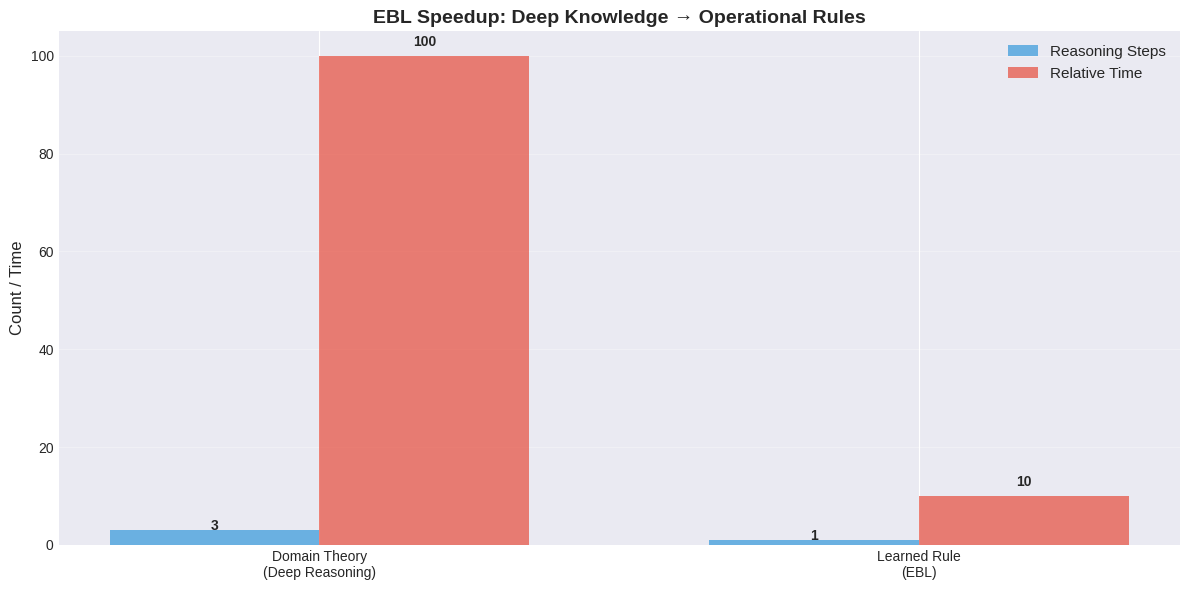


💡 Key Insight: EBL doesn't discover new knowledge—it reformulates
   existing knowledge into more usable form!


In [ ]:
# EBL Walkthrough
print_section_header("EBL Walkthrough: SafeToStack(Obj1, Obj2)", "🎓")

walkthrough = stack_data['ebl_walkthrough_example']

print("="*80)
print("STEP 1: EXPLAIN (Build Proof Tree)")
print("="*80 + "\n")

print(f"Goal: {walkthrough['example']}\n")
print("Given Facts:")
for obj, facts in walkthrough['given_facts'].items():
    print(f"  {obj}:")
    for attr, value in facts.items():
        print(f"    {attr}({obj}, {value})")
print()

print("Proof Tree Construction:\n")
print("SafeToStack(Obj1, Obj2)")
print("    ↓ [Apply Rule 1: SafeToStack(x,y) ← Lighter(x,y)]")
print("Lighter(Obj1, Obj2)")
print("    ↓ [Apply Rule 3: Lighter(x,y) ← Weight(x,wx) ∧ Weight(y,wy) ∧ LessThan(wx,wy)]")
print("Weight(Obj1, w1) ∧ Weight(Obj2, w2) ∧ LessThan(w1, w2)")
print("    ↓ [Apply Rule 4 twice: Weight(x,w) ← Volume(x,v) ∧ Density(x,d) ∧ Equal(w, v×d)]")
print("Volume(Obj1, 10) ∧ Density(Obj1, 0.5) ∧ Equal(w1, 10×0.5)")
print("∧ Volume(Obj2, 20) ∧ Density(Obj2, 0.6) ∧ Equal(w2, 20×0.6)")
print("∧ LessThan(5, 12)")
print("    ↓ [Evaluate arithmetic]")
print("TRUE ✓\n")

print("="*80)
print("STEP 2: ANALYZE (Extract General Conditions)")
print("="*80 + "\n")

print("Look at proof tree and replace specific values with variables:\n")
print("Specific values → Variables:")
print("  Obj1 → x (any object)")
print("  Obj2 → y (any object)")
print("  10, 0.5, 5 → vx, dx, (vx×dx)")
print("  20, 0.6, 12 → vy, dy, (vy×dy)\n")

print("Weakest Preimage (Most General Conditions):")
print("  'The explanation holds for ANY x and y where x's weight < y's weight'\n")

print("="*80)
print("STEP 3: REFINE (Create Operational Rule)")
print("="*80 + "\n")

print("Learned Rule:")
print(f"  {walkthrough['weakest_preimage']}\n")

print("Interpretation:")
print(f"  {walkthrough['learned_rule_interpretation']}\n")

print("="*80)
print("What We Achieved")
print("="*80 + "\n")

print("BEFORE EBL (Using Domain Theory):")
print("  SafeToStack → Lighter → Weight → Volume×Density → Calculate")
print("  (3-step reasoning chain)\n")

print("AFTER EBL (Using Learned Rule):")
print("  SafeToStack → Direct check: vx×dx < vy×dy")
print("  (1-step direct computation!)\n")

print("Benefits:")
print("  ✓ Flattened multi-step reasoning into single rule")
print("  ✓ Works for ANY objects with lighter-than relationship")
print("  ✓ Bypasses intermediate concepts (Lighter, Weight)")
print("  ✓ Much faster to apply!")
print("  ✓ Still logically sound (derived from correct theory)\n")

# Visualize the speedup
fig, ax = plt.subplots(figsize=(12, 6))

methods = ['Domain Theory\n(Deep Reasoning)', 'Learned Rule\n(EBL)']
steps = [3, 1]  # Number of reasoning steps
time = [100, 10]  # Relative time (arbitrary units)

x = np.arange(len(methods))
width = 0.35

ax.bar(x - width/2, steps, width, label='Reasoning Steps', color='#3498db', alpha=0.7)
ax.bar(x + width/2, time, width, label='Relative Time', color='#e74c3c', alpha=0.7)

ax.set_ylabel('Count / Time', fontsize=12)
ax.set_title('EBL Speedup: Deep Knowledge → Operational Rules', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for i, (s, t) in enumerate(zip(steps, time)):
    ax.text(i - width/2, s + 0.1, str(s), ha='center', fontsize=10, fontweight='bold')
    ax.text(i + width/2, t + 2, str(t), ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: EBL doesn't discover new knowledge—it reformulates")
print("   existing knowledge into more usable form!")

---

# Part 5: Comparisons and Applications

## 📊 Slide 18: Inductive vs Analytical Learning

### Comparing the Two Paradigms

| Aspect | Inductive Learning | Analytical Learning |
|--------|-------------------|---------------------|
| **Input** | Data + Hypothesis space | Data + Hypothesis space + **Domain theory** |
| **Learning Style** | Pattern matching from data | Explanation + generalization |
| **Sample Complexity** | Needs many examples | Can learn from few examples |
| **Guarantee** | Statistical (probably correct) | Deductive (logically correct if theory correct) |
| **Hypothesis Space** | Searches entire space | Constrained by theory |
| **Explainability** | Often black box | Fully explainable |
| **New Knowledge** | Can discover truly novel patterns | Reformulates existing knowledge |
| **Robustness** | Handles noisy data well | Sensitive to theory errors |
| **When Theory Wrong** | Still learns from data | May learn incorrect rules |

### When to Use Each?

**Use Inductive Learning When:**
- ✓ Lots of training data available
- ✓ No good domain theory exists
- ✓ Discovering novel patterns
- ✓ Data is noisy or messy
- ✓ Want to find surprising insights

**Examples:** Image recognition, spam detection, recommendation systems

**Use Analytical Learning When:**
- ✓ Limited training data
- ✓ Strong prior knowledge exists
- ✓ Need explainable decisions
- ✓ Rules of domain are well-known
- ✓ Correctness is critical

**Examples:** Chess, physics problems, logic puzzles, planning

**The Best Approach: Combine Both!**

```
Inductive-Analytical Hybrid:
1. Start with domain theory (analytical)
2. Use data to refine/correct theory (inductive)
3. Use theory to guide search (analytical)
4. Handle exceptions with data (inductive)
```

---

# Part 6: Self-Assessment and Practice

## 📝 Test Your Understanding

In [ ]:
# Self-Assessment Questions
print_section_header("Self-Assessment Questions", "📝")

questions = [
    {
        'id': 1,
        'type': 'Multiple Choice',
        'question': 'What is the main difference between sequential covering and decision tree learning?',
        'options': [
            'A) Sequential covering is faster',
            'B) Sequential covering learns rules one at a time, decision trees learn all rules simultaneously',
            'C) Decision trees are more accurate',
            'D) Sequential covering cannot handle categorical data'
        ],
        'answer': 'B',
        'explanation': 'Sequential covering learns rules independently one at a time, removing covered examples '
                      'after each rule. Decision trees learn all rules simultaneously as they share decisions at top nodes.'
    },
    {
        'id': 2,
        'type': 'Multiple Choice',
        'question': 'In FOIL, what does the FoilGain metric measure?',
        'options': [
            'A) The number of variables in a rule',
            'B) The reduction in entropy from adding a literal',
            'C) The information gain accounting for variable bindings',
            'D) The computational cost of evaluating a rule'
        ],
        'answer': 'C',
        'explanation': 'FoilGain measures information gain but accounts for variable bindings. '
                      'It considers how many positive bindings are still covered after adding a literal.'
    },
    {
        'id': 3,
        'type': 'Multiple Choice',
        'question': 'What is the "weakest preimage" in EBL?',
        'options': [
            'A) The least accurate rule',
            'B) The most general conditions under which the explanation holds',
            'C) The simplest domain theory',
            'D) The minimum number of training examples needed'
        ],
        'answer': 'B',
        'explanation': 'The weakest preimage represents the most general conditions under which the proof '
                      'tree holds. It abstracts away specific details to create a broadly applicable rule.'
    },
    {
        'id': 4,
        'type': 'True/False',
        'question': 'First-order rules can express relationships that propositional rules cannot.',
        'answer': 'True',
        'explanation': 'TRUE. First-order rules use variables and can express relationships between objects '
                      '(e.g., Grandparent(x,y) ← Parent(x,z) ∧ Parent(z,y)). Propositional rules can only '
                      'describe attributes of single objects.'
    },
    {
        'id': 5,
        'type': 'True/False',
        'question': 'EBL can discover knowledge that is not already in the domain theory.',
        'answer': 'False',
        'explanation': 'FALSE. EBL reformulates existing knowledge into more operational form. It cannot '
                      'discover truly novel knowledge—it only makes existing knowledge more efficient to use.'
    },
    {
        'id': 6,
        'type': 'True/False',
        'question': 'Sequential covering removes examples after learning each rule.',
        'answer': 'True',
        'explanation': 'TRUE. After learning each rule, sequential covering removes the positive examples '
                      'correctly covered by that rule, then learns the next rule on remaining examples.'
    },
    {
        'id': 7,
        'type': 'Conceptual',
        'question': 'Why might rule-based learning be preferred over neural networks in medical diagnosis?',
        'answer': 'Rule-based learning produces explainable, human-readable rules that doctors can understand '
                 'and verify. In medical diagnosis, it\'s critical to explain WHY a diagnosis was made, not just '
                 'what the diagnosis is. Rules like "IF fever=VeryHigh AND breathing=Severe THEN COVID-19" can '
                 'be validated by medical experts and explained to patients. Neural networks are black boxes '
                 'that cannot provide such explanations, which is problematic for medical liability and trust.'
    },
    {
        'id': 8,
        'type': 'Conceptual',
        'question': 'Explain the paradox: "If we have a perfect domain theory, why do we need to learn?"',
        'answer': 'A perfect domain theory tells us what is true in principle, but may be computationally '
                 'expensive to apply. For example, we know physics laws perfectly (F=ma), but solving complex '
                 'physics problems from first principles is slow. EBL learns operational shortcuts that '
                 'transform deep, principled knowledge into fast, directly applicable rules. It\'s like '
                 'memorizing multiplication tables instead of adding repeatedly—same result, much faster.'
    },
    {
        'id': 9,
        'type': 'Conceptual',
        'question': 'What are the three types of literals FOIL can add to a rule?',
        'answer': '1) New predicate with variables Q(v1, v2, ..., vr) where at least one variable already '
                 'exists in the rule and new variables can be introduced. '
                 '2) Equality test Equal(xi, xj) where both variables already exist in the rule. '
                 '3) Negations of the above two types, e.g., ¬Q(...) or ¬Equal(...).'
    },
    {
        'id': 10,
        'type': 'Conceptual',
        'question': 'Compare the sample complexity of inductive vs analytical learning.',
        'answer': 'Inductive learning requires many training examples because it must search a large hypothesis '
                 'space with only data as guidance. Many hypotheses may fit small datasets. Analytical learning '
                 'can learn from very few examples (even one!) because the domain theory constrains the '
                 'hypothesis space dramatically. The theory provides additional information beyond the data, '
                 'reducing ambiguity. However, analytical learning requires a good domain theory, which may '
                 'not always be available.'
    }
]

# Display questions
# Display questions safely
for q in questions:
    print(f"\nQuestion {q['id']} ({q['type']}):")
    print(f"  {q['question']}")

    if 'options' in q:
        for opt in q['options']:
            print(f"    {opt}")

    print(f"\n  ✅ Answer: {q['answer']}")

    # Only print explanation if it exists
    if 'explanation' in q:
        print(f"  💡 Explanation: {q['explanation']}")

    print("  " + "-"*70)

print("\n" + "="*80)
print("📊 How did you do? Review any concepts you found challenging!")
print("="*80)


📝 Self-Assessment Questions


Question 1 (Multiple Choice):
  What is the main difference between sequential covering and decision tree learning?
    A) Sequential covering is faster
    B) Sequential covering learns rules one at a time, decision trees learn all rules simultaneously
    C) Decision trees are more accurate
    D) Sequential covering cannot handle categorical data

  ✅ Answer: B
  💡 Explanation: Sequential covering learns rules independently one at a time, removing covered examples after each rule. Decision trees learn all rules simultaneously as they share decisions at top nodes.
  ----------------------------------------------------------------------

Question 2 (Multiple Choice):
  In FOIL, what does the FoilGain metric measure?
    A) The number of variables in a rule
    B) The reduction in entropy from adding a literal
    C) The information gain accounting for variable bindings
    D) The computational cost of evaluating a rule

  ✅ Answer: C
  💡 Explanation: Foi

---

# Part 7: Summary and Real-World Applications

## 🌍 Slide 19: Real-World Applications

In [ ]:
# Real-world applications
print_section_header("Real-World Applications of Rule Learning", "🌍")

applications = [
    {
        'name': 'SOAR (State, Operator And Result)',
        'domain': 'Cognitive Architecture',
        'technique': 'EBL + Chunking',
        'description': 'Learns problem-solving strategies by chunking successful solution paths. '
                      'Used in robotics, game AI, and intelligent tutoring systems.',
        'impact': 'Enables agents to learn from experience and improve performance over time.'
    },
    {
        'name': 'PRODIGY',
        'domain': 'Planning and Problem Solving',
        'technique': 'EBL for control knowledge',
        'description': 'Learns search control rules to guide planning. Analyzes successful plans '
                      'to extract general strategies.',
        'impact': 'Dramatically speeds up planning by avoiding futile search paths.'
    },
    {
        'name': 'Chess Programs (Deep Blue era)',
        'domain': 'Game Playing',
        'technique': 'EBL for opening book',
        'description': 'Analyzes master games to extract opening principles and endgame patterns. '
                      'Converts deep analysis into fast lookup rules.',
        'impact': 'Enables rapid opening play and endgame recognition.'
    },
    {
        'name': 'DENDRAL',
        'domain': 'Chemical Structure Analysis',
        'technique': 'Rule-based expert system',
        'description': 'Infers molecular structure from mass spectrometry data using chemical rules. '
                      'One of the first successful AI systems.',
        'impact': 'Matched human expert performance in identifying organic molecules.'
    },
    {
        'name': 'Fraud Detection Systems',
        'domain': 'Financial Services',
        'technique': 'Sequential Covering',
        'description': 'Learns interpretable rules for detecting fraudulent transactions. '
                      'Rules can be audited and explained to regulators.',
        'impact': 'Saves billions annually while maintaining regulatory compliance.'
    },
    {
        'name': 'Medical Diagnosis (MYCIN)',
        'domain': 'Healthcare',
        'technique': 'Rule-based reasoning',
        'description': 'Diagnoses bacterial infections using ~600 rules. Explains reasoning '
                      'to doctors in natural language.',
        'impact': 'Achieved expert-level diagnostic accuracy with full explainability.'
    }
]

for i, app in enumerate(applications, 1):
    print(f"\n{i}. {app['name']}")
    print(f"   Domain: {app['domain']}")
    print(f"   Technique: {app['technique']}")
    print(f"   Description: {app['description']}")
    print(f"   Impact: {app['impact']}")
    print("   " + "-"*70)

print("\n💡 Common Thread: All these applications need EXPLAINABLE decisions!")
print("   Rule-based learning provides transparency that black-box methods cannot.")


🌍 Real-World Applications of Rule Learning


1. SOAR (State, Operator And Result)
   Domain: Cognitive Architecture
   Technique: EBL + Chunking
   Description: Learns problem-solving strategies by chunking successful solution paths. Used in robotics, game AI, and intelligent tutoring systems.
   Impact: Enables agents to learn from experience and improve performance over time.
   ----------------------------------------------------------------------

2. PRODIGY
   Domain: Planning and Problem Solving
   Technique: EBL for control knowledge
   Description: Learns search control rules to guide planning. Analyzes successful plans to extract general strategies.
   Impact: Dramatically speeds up planning by avoiding futile search paths.
   ----------------------------------------------------------------------

3. Chess Programs (Deep Blue era)
   Domain: Game Playing
   Technique: EBL for opening book
   Description: Analyzes master games to extract opening principles and endgame patterns

## 🎯 Slide 20: Key Takeaways


🎯 Module 2: Key Takeaways


📚 What We Learned:

1. Sequential Covering:
   • Learns rules ONE AT A TIME (vs. decision trees learning all at once)
   • Removes covered examples after each rule
   • Each rule is independent and interpretable
   • Natural for disjunctive concepts (Rule1 OR Rule2 OR ...)

2. FOIL Algorithm:
   • Extends sequential covering to first-order logic
   • Uses variables to express relationships between objects
   • One rule can cover infinite instances
   • FoilGain metric accounts for variable bindings
   • Three types of literals: new predicates, equality, negations

3. Explanation-Based Learning:
   • Uses prior knowledge (domain theory) to guide learning
   • Three steps: EXPLAIN → ANALYZE → REFINE
   • Transforms deep knowledge into operational rules
   • Can learn from very few examples
   • Does not discover new knowledge—reformulates existing knowledge

4. Inductive vs Analytical:
   • Inductive: Learn from data alone (many examples needed)
   • Analytic

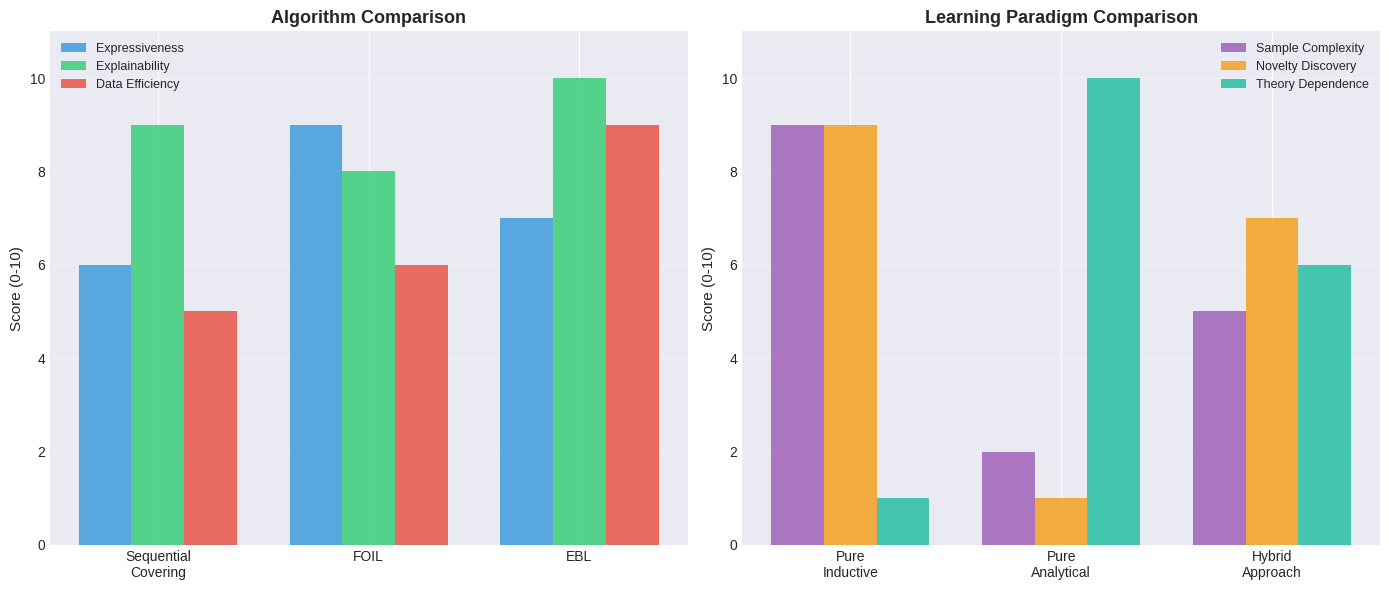


🚀 Next Steps

To deepen your understanding:
   1. Implement FOIL for other family relationships (Uncle, Cousin, Sibling)
   2. Apply sequential covering to the medical diagnosis dataset
   3. Create your own domain theory and apply EBL
   4. Compare rule-based vs decision tree performance on same dataset
   5. Read: Mitchell Chapter 10-11 for deeper mathematical treatment

Prepare for Module 3:
   • Review Bayesian probability (prior, posterior, likelihood)
   • Understand conditional independence
   • Practice with probability calculations

🎉 Congratulations! You've completed Module 2!

You now understand how to:
   ✅ Learn interpretable rules from data
   ✅ Express complex relationships with first-order logic
   ✅ Leverage prior knowledge to learn efficiently
   ✅ Choose the right learning paradigm for your problem

Keep learning, keep building, and remember: Explainability matters! 🌟


In [ ]:
# Module summary
print_section_header("Module 2: Key Takeaways", "🎯")

print("\n📚 What We Learned:\n")

takeaways = [
    {
        'topic': 'Sequential Covering',
        'key_points': [
            'Learns rules ONE AT A TIME (vs. decision trees learning all at once)',
            'Removes covered examples after each rule',
            'Each rule is independent and interpretable',
            'Natural for disjunctive concepts (Rule1 OR Rule2 OR ...)'
        ]
    },
    {
        'topic': 'FOIL Algorithm',
        'key_points': [
            'Extends sequential covering to first-order logic',
            'Uses variables to express relationships between objects',
            'One rule can cover infinite instances',
            'FoilGain metric accounts for variable bindings',
            'Three types of literals: new predicates, equality, negations'
        ]
    },
    {
        'topic': 'Explanation-Based Learning',
        'key_points': [
            'Uses prior knowledge (domain theory) to guide learning',
            'Three steps: EXPLAIN → ANALYZE → REFINE',
            'Transforms deep knowledge into operational rules',
            'Can learn from very few examples',
            'Does not discover new knowledge—reformulates existing knowledge'
        ]
    },
    {
        'topic': 'Inductive vs Analytical',
        'key_points': [
            'Inductive: Learn from data alone (many examples needed)',
            'Analytical: Learn from data + theory (few examples needed)',
            'Best approach: Combine both (hybrid methods)',
            'Choose based on: data availability, domain knowledge, explainability needs'
        ]
    }
]

for i, section in enumerate(takeaways, 1):
    print(f"{i}. {section['topic']}:")
    for point in section['key_points']:
        print(f"   • {point}")
    print()

print("="*80)
print("🌟 The Big Picture")
print("="*80 + "\n")

print("Rule-based learning sits at the intersection of:")
print("   • Machine Learning (data-driven pattern discovery)")
print("   • Logic and Knowledge Representation (symbolic reasoning)")
print("   • Explainable AI (transparent, interpretable decisions)\n")

print("When to use rule-based learning:")
print("   ✓ Explainability is critical (medical, legal, financial)")
print("   ✓ Domain experts need to validate/modify rules")
print("   ✓ Regulatory compliance requires transparency")
print("   ✓ Relational data (databases, knowledge graphs)")
print("   ✓ Prior knowledge available (domain theories)\n")

print("When NOT to use rule-based learning:")
print("   ✗ High-dimensional perceptual data (images, audio)")
print("   ✗ Complex non-linear patterns (deep learning excels)")
print("   ✗ Massive datasets where interpretability not needed")
print("   ✗ Rapidly changing domains (rules become outdated)\n")

# Create visual summary
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Algorithm comparison
ax1 = axes[0]
algorithms = ['Sequential\nCovering', 'FOIL', 'EBL']
expressiveness = [6, 9, 7]  # Arbitrary scale
explainability = [9, 8, 10]
data_efficiency = [5, 6, 9]

x = np.arange(len(algorithms))
width = 0.25

ax1.bar(x - width, expressiveness, width, label='Expressiveness', color='#3498db', alpha=0.8)
ax1.bar(x, explainability, width, label='Explainability', color='#2ecc71', alpha=0.8)
ax1.bar(x + width, data_efficiency, width, label='Data Efficiency', color='#e74c3c', alpha=0.8)

ax1.set_ylabel('Score (0-10)', fontsize=11)
ax1.set_title('Algorithm Comparison', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.legend(fontsize=9)
ax1.set_ylim(0, 11)
ax1.grid(axis='y', alpha=0.3)

# Right: Learning paradigms
ax2 = axes[1]
paradigms = ['Pure\nInductive', 'Pure\nAnalytical', 'Hybrid\nApproach']
sample_complexity = [9, 2, 5]  # Higher = needs more samples
novelty_discovery = [9, 1, 7]  # Can discover new patterns
theory_dependence = [1, 10, 6]  # Needs domain theory

x2 = np.arange(len(paradigms))

ax2.bar(x2 - width, sample_complexity, width, label='Sample Complexity', color='#9b59b6', alpha=0.8)
ax2.bar(x2, novelty_discovery, width, label='Novelty Discovery', color='#f39c12', alpha=0.8)
ax2.bar(x2 + width, theory_dependence, width, label='Theory Dependence', color='#1abc9c', alpha=0.8)

ax2.set_ylabel('Score (0-10)', fontsize=11)
ax2.set_title('Learning Paradigm Comparison', fontsize=13, fontweight='bold')
ax2.set_xticks(x2)
ax2.set_xticklabels(paradigms)
ax2.legend(fontsize=9)
ax2.set_ylim(0, 11)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("🚀 Next Steps")
print("="*80 + "\n")

print("To deepen your understanding:")
print("   1. Implement FOIL for other family relationships (Uncle, Cousin, Sibling)")
print("   2. Apply sequential covering to the medical diagnosis dataset")
print("   3. Create your own domain theory and apply EBL")
print("   4. Compare rule-based vs decision tree performance on same dataset")
print("   5. Read: Mitchell Chapter 10-11 for deeper mathematical treatment\n")

print("Prepare for Module 3:")
print("   • Review Bayesian probability (prior, posterior, likelihood)")
print("   • Understand conditional independence")
print("   • Practice with probability calculations\n")

print("="*80)
print("🎉 Congratulations! You've completed Module 2!")
print("="*80)
print("\nYou now understand how to:")
print("   ✅ Learn interpretable rules from data")
print("   ✅ Express complex relationships with first-order logic")
print("   ✅ Leverage prior knowledge to learn efficiently")
print("   ✅ Choose the right learning paradigm for your problem\n")
print("Keep learning, keep building, and remember: Explainability matters! 🌟")